# P5 - Segmentez des clients d'un site e-commerce

 ##  Problématique
L'entreprise Olist souhaite que nous fournissions à ses équipes
d'e-commerce une segmentation des clients qu’elles pourront utiliser
au quotidien pour leurs campagnes de communication.

## Objectifs dans ce projet


Il y en a 3 :

- Comprendre les différents types d’utilisateurs
grâce à leur comportement et à leurs données personnelles
- Fournir à l’équipe marketing une description actionnable
de notre segmentation et de sa logique sous-jacente
pour une utilisation optimale
- Réaliser une proposition de contrat de maintenance
basée sur une analyse de la stabilité des segments au cours du temps

## Sources

Nos données sont les données d'un client Brésilien, c'est un ensemble de dataset d'un site de e-commerce Brésilien. Ces datasets contiennent les données des commandes électroniques passées sur le site Brésilent Olist. Le jeu de données contient des informations sur 100000 commandes passées entre 2016 et 2018 sur plusieurs marchés au Brésil. Les différentes features présents dans le dataset permettent de visualiser une commande à partir sous plusieurs dimensions : statut de la commande, prix, paiement, performances du transport, l'emplacement du client, attributs du produit et aussi les avis rédigés par les clients.


Nos données sont dans des csv dans le dossier archive du répertoire courant. Ce dossier contient neuf csv.


•	olist_customers_dataset.csv contient les informations clients.

•	olist_geolocation_dataset.csv contient les informations sur la géolocalisation

•	olist_order_items_dataset.csv contient les informations sur les items

•	olist_order_payments_dataset.csv contient les informations sur les payements

•	olist_order_reviews_dataset.csv contient les informations l'évaluation des produits

•	olist_orders_dataset.csv contient les informations sur les achats

•	olist_products_dataset.csv contient les informations sur les produits

•	olist_sellers_dataset.csv contient les informations sur les vendeurs

•	product_category_name_translation.csv contient les informations sur les catégories des produits




## Importation des librairies

In [116]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from math import pi
import statistics

# Pré processing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




## Chargement des jeux de données

In [117]:
# Infos sur les clients
customers = pd.read_csv( "olist_customers_dataset.csv")
# Infos sur les payments
payments = pd.read_csv("olist_order_payments_dataset.csv")
# Infos sur les achats
orders = pd.read_csv( "olist_orders_dataset.csv")
# Infos sur les produits
products = pd.read_csv( "olist_products_dataset.csv")
# Infos sur les vendeurs
sellers = pd.read_csv("olist_sellers_dataset.csv")
# Infos sur l'évaluation des produits
reviews = pd.read_csv( "olist_order_reviews_dataset.csv")
# Infos sur la géolocalisation
geo = pd.read_csv("olist_geolocation_dataset.csv")
# Infos sur les items
items = pd.read_csv("olist_order_items_dataset.csv")
# Infos sur les catégories des produits
category = pd.read_csv("product_category_name_translation.csv")

## Connaissance du jeu de données et Nettoyage

In [118]:
#Création d'une fonction pour analyser la structure des dataframes

def data_structure(data):
    ''' Affiche la structure du dataframe'''
    
    # comptage des colonnes numériques et catégorielles
    numeric_columns = len(data.select_dtypes(include = ['int64','float64']).columns)
    categorical_columns= len(data.select_dtypes(include=['object','category']).columns)

    # création d'un dictionnaire avec les items de structure de nos données
    dict_structure = {'Nombre de lignes':data.shape[0], 'Nombre de colonnes':int(data.shape[1]), 
                      'Nombre de variables catégorielles':categorical_columns,
                      'Nombre de variables numériques ':numeric_columns,
                      'Pourcentage de données manquantes':int((data.isnull().sum()/len(data)*100).sum()),
                      'Nombre de doublons':int(len(data[data.duplicated()]))}

    # transformation des éléments du dictionnaire en dataframe
    dataframe =pd.DataFrame(list(dict_structure.items()),columns=['Caractéristiques','Valeurs'])
    return dataframe

In [119]:
# Une fonction qui retourne la description des variables qualitatives/quantitatives
def desc_var(df, type_var='all'):
    df_taille = df.shape[0]
    if type_var == 'num':
        desc_var = df.describe()
    elif type_var == 'cat':
        desc_var = df.describe(exclude=[np.number])
    else:
        desc_var = df.describe(include='all')

    desc_type = pd.DataFrame(desc_var.dtypes, columns=['type']).T
    nb_nan = df_taille - desc_var.loc['count'].T
    pourcentage_nan = nb_nan * 100 / df_taille
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan],
                            index=['nb_nan', '%_nan'])
    desc_var = pd.concat([desc_type, desc_nan, desc_var])

    return desc_var

### Infos sur les clients _ customers _ 

In [120]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [121]:
#la structure des dataframes
data_structure(customers)

Caractéristiques  Valeurs
0                   Nombre de lignes    99441
1                 Nombre de colonnes        5
2  Nombre de variables catégorielles        4
3    Nombre de variables numériques         1
4  Pourcentage de données manquantes        0
5                 Nombre de doublons        0

In [122]:
# description des variables qualitatives/quantitatives
desc_var(customers, type_var='all')


customer_id                customer_unique_id  \
type                              object                            object   
nb_nan                               0.0                               0.0   
%_nan                                0.0                               0.0   
count                              99441                             99441   
unique                             99441                             96096   
top     06b8999e2fba1a1fbc88172c00ba8bc7  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       customer_zip_code_prefix customer_city customer_state  
type                    float64        object         object  
nb_nan                      0.0           0.0            0.0  
%_nan                       0.0           0.0            0.0  
count                   99441.0         99441          99441  
unique                      NaN          4119             27  
top                         NaN     sao paulo             SP  
freq                        NaN         15540          41746  
mean               35137.474583           NaN            NaN  
std                29797.938996           NaN            NaN  
min                      1003.0           NaN            NaN  
25%                     11347.0           NaN            NaN  
50%                     24416.0           NaN            NaN  
75%                     58900.0           NaN            NaN  
max                     99990.0           NaN            NaN

In [123]:
# Distributions du nombre de commandes par nombre de clients
# -----------------------------------------------------------------------

# DataFrame de travail
nb_client = customers['customer_unique_id'].nunique()
series_commande_par_client = customers.groupby(
    'customer_unique_id').size().value_counts()
df_visu_commandes = pd.DataFrame(
    {'Nb_commandes': series_commande_par_client.index,
     'Nb_clients': series_commande_par_client.values})
df_visu_commandes['%'] = round(
    (df_visu_commandes['Nb_clients'])*100/nb_client, 3)

df_visu_commandes

Nb_commandes  Nb_clients       %
0             1       93099  96.881
1             2        2745   2.857
2             3         203   0.211
3             4          30   0.031
4             5           8   0.008
5             6           6   0.006
6             7           3   0.003
7             9           1   0.001
8            17           1   0.001

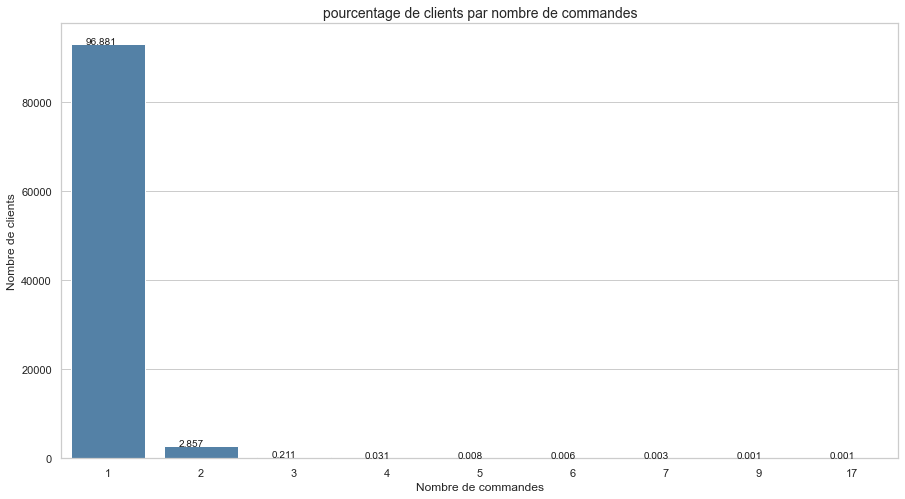

In [124]:
# Barplot de la distribution
ax1 = plt.gca()
sns.set_style("white")
sns.barplot(x='Nb_commandes', y='Nb_clients',
            data=df_visu_commandes, color='SteelBlue', ax=ax1)
ax1.set_xlabel('Nombre de commandes', fontsize=12)
ax1.set_ylabel('Nombre de clients', fontsize=12)
ax1.set_title('pourcentage de clients par nombre de commandes', fontsize=14)
for i, p in enumerate(ax1.patches):
    ax1.text(
        p.get_width() /
        5 +
        p.get_x(),
        p.get_height() +
        p.get_y(),
        df_visu_commandes['%'][i],
        fontsize=10,
        color='k')
plt.gcf().set_size_inches(15, 8)
plt.show()

Répartition des clients par état

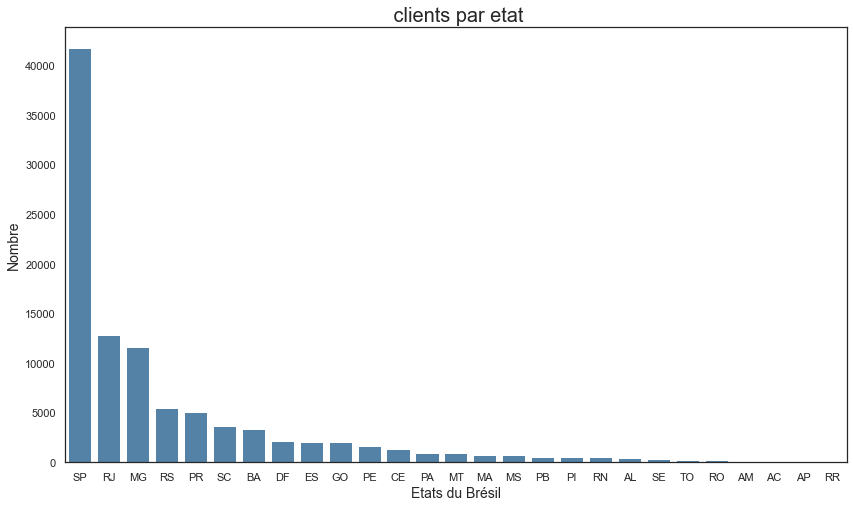

In [125]:
# Répartition du nombre de clients par état du Brésil
# -----------------------------------------------------------------------
clients_par_etat = customers.groupby(['customer_id', 'customer_state']).count().reset_index()

# Countplot
plt.figure(figsize=(14, 8))
sns.countplot(x=clients_par_etat.customer_state, data=clients_par_etat,
              order=clients_par_etat.customer_state.value_counts().index,
              color='SteelBlue')

plt.title(' clients par etat', fontsize=20)
plt.ylabel('Nombre', fontsize=14)
plt.xlabel('Etats du Brésil', fontsize=14)


plt.grid(False)
plt.show()

In [126]:
# Les villes ayant le plus de commande de clients
# -----------------------------------------------------------------------
ville_populaire_clients = pd.DataFrame(customers['customer_city'].value_counts())
ville_populaire_clients.head(10)

customer_city
sao paulo                      15540
rio de janeiro                  6882
belo horizonte                  2773
brasilia                        2131
curitiba                        1521
campinas                        1444
porto alegre                    1379
salvador                        1245
guarulhos                       1189
sao bernardo do campo            938

#### customer_zip_code_prefix 


- customer_zip_code_prefix - code postal de la ville de résidence du client (5 chiffres)

- Le code postal est défini comme un entier : à transformer en objet et on doit compléter à gauche par des zéros

In [127]:
# Transformation de int64 en object et suppression '.0'
customers['customer_zip_code_prefix'] =customers['customer_zip_code_prefix'].astype('object') \
    .apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
customers['customer_zip_code_prefix'] = customers['customer_zip_code_prefix'].str.rjust(5, '0')

In [128]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix    object
customer_city               object
customer_state              object
dtype: object

Regroupement des états en régions

**Bilan**


Deux variables sont utilisées pour identifier les clients :

- customer_id est un jeton d'identification du client qui est généré pour chaque commande. Si le même client passe plusieurs commandes, il possède plusieurs identifiants 'customer_id'.
- customer_unique_id qui est unique à chaque client et peut être utilisé pour suivre leurs achats dans le temps.


- Le jeu de données est assez déséquilibré car environ 97% des clients n'ont commandé qu'une seule fois, moins de 3% de clients ont commandé 2 fois et le nombre de clients ayant commandé plus de 2 fois est inférieur à 1%.


- La plupart des clients (plus d'un tiers) sont localisés dans les 3 états :
   - SP : São Paulo,
   - RJ : Rio de Janeiro,
   - et MG : Minas Gerais

### Infos sur les payments _ payments_ 

In [129]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [130]:
#la structure des dataframes
data_structure(payments)

Caractéristiques  Valeurs
0                   Nombre de lignes   103886
1                 Nombre de colonnes        5
2  Nombre de variables catégorielles        2
3    Nombre de variables numériques         3
4  Pourcentage de données manquantes        0
5                 Nombre de doublons        0

In [131]:
# description des variables qualitatives/quantitatives
desc_var(payments, type_var='all')


order_id payment_sequential payment_type  \
type                              object            float64       object   
nb_nan                               0.0                0.0          0.0   
%_nan                                0.0                0.0          0.0   
count                             103886           103886.0       103886   
unique                             99440                NaN            5   
top     fa65dad1b0e818e3ccc5cb0e39231352                NaN  credit_card   
freq                                  29                NaN        76795   
mean                                 NaN           1.092679          NaN   
std                                  NaN           0.706584          NaN   
min                                  NaN                1.0          NaN   
25%                                  NaN                1.0          NaN   
50%                                  NaN                1.0          NaN   
75%                                  NaN                1.0          NaN   
max                                  NaN               29.0          NaN   

       payment_installments payment_value  
type                float64       float64  
nb_nan                  0.0           0.0  
%_nan                   0.0           0.0  
count              103886.0      103886.0  
unique                  NaN           NaN  
top                     NaN           NaN  
freq                    NaN           NaN  
mean               2.853349     154.10038  
std                2.687051    217.494064  
min                     0.0           0.0  
25%                     1.0         56.79  
50%                     1.0         100.0  
75%                     4.0      171.8375  
max                    24.0      13664.08

In [132]:
# Idée du pourcentage par type de paiement
series_type_paiement = payments.groupby('payment_type')['order_id'] \
    .count()
df_type_paiement = pd.DataFrame({'Type paiement': series_type_paiement
                                 .index,
                                 'Nb_par_type': series_type_paiement
                                 .values})
nb_tot = df_type_paiement['Nb_par_type'].sum()
df_type_paiement['%'] = \
    round((df_type_paiement['Nb_par_type']*100)/nb_tot, 3)
df_type_paiement.sort_values(by='%', ascending=False)

Type paiement  Nb_par_type       %
1   credit_card        76795  73.922
0        boleto        19784  19.044
4       voucher         5775   5.559
2    debit_card         1529   1.472
3   not_defined            3   0.003

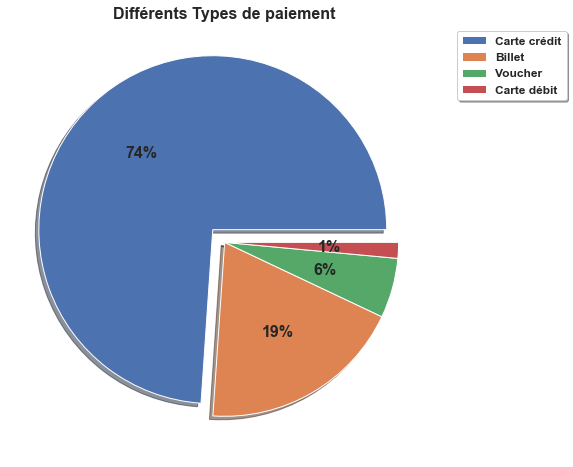

In [133]:
# Pieplot - répartition des différents mode de paiements
# -----------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect='equal'))
explode = (0.1, 0, 0, 0)
legend = ['Carte crédit', 'Billet', 'Voucher',
          'Carte débit']

p =payments['payment_type'][payments['payment_type'] != 'not_defined'].value_counts()
p.plot(kind="pie", legend=False, labels=None, startangle=0,
       explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True,
       textprops={'weight': 'bold', 'fontsize': 16}, 
       ax=ax)
ax.legend(legend, loc='best', shadow=True,
          prop={'weight': 'bold', 'size': 12},
          bbox_to_anchor=(0.8, 0, 0.5, 1))
plt.title('Différents Types de paiement', fontweight='bold', size=16)
plt.ylabel("")
plt.show()

Text(0.5, 0, 'payment_installments')

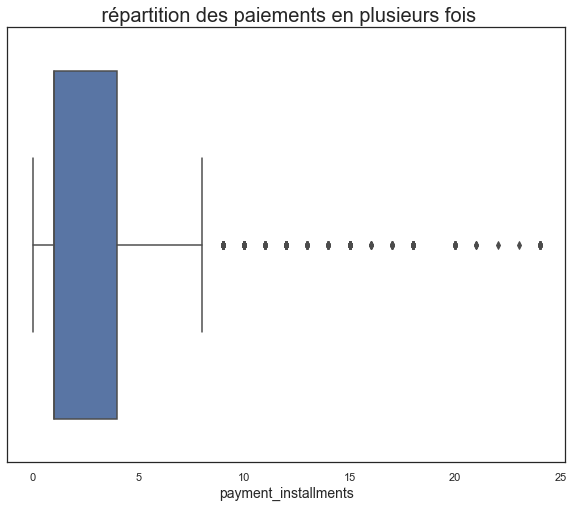

In [134]:
# répartition des paiements en plusieurs fois
plt.figure(figsize=(10, 8))
sns.boxplot(payments['payment_installments'])

plt.title(' répartition des paiements en plusieurs fois', fontsize=20)
plt.xlabel('payment_installments', fontsize=14)



**Bilan**


- Un client peut payer avec plusieurs moyens de paiement , La majorité des paiement se font : par **carte bancaire à débit** différé (74%), puis en **billet** (19%),
- Un client peut payer en plusieurs fois.
- La plupart des commmandes sont payées avec 1 seul moyen de paiement , mais les paiements s'échelonnant de 2 à 5 fois ne sont pas rares

### Infos sur les achats _ orders _

In [135]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [136]:
# la structure des dataframes
data_structure(orders)

Caractéristiques  Valeurs
0                   Nombre de lignes    99441
1                 Nombre de colonnes        8
2  Nombre de variables catégorielles        8
3    Nombre de variables numériques         0
4  Pourcentage de données manquantes        4
5                 Nombre de doublons        0

In [137]:
# description des variables qualitatives/quantitatives
desc_var(orders,type_var='all')


order_id                       customer_id  \
type                              object                            object   
nb_nan                               0.0                               0.0   
%_nan                                0.0                               0.0   
count                              99441                             99441   
unique                             99441                             99441   
top     e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
freq                                   1                                 1   

       order_status order_purchase_timestamp    order_approved_at  \
type         object                   object               object   
nb_nan          0.0                      0.0                160.0   
%_nan           0.0                      0.0             0.160899   
count         99441                    99441                99281   
unique            8                    98875                90733   
top       delivered      2018-04-11 10:48:14  2018-02-27 04:31:10   
freq          96478                        3                    9   

       order_delivered_carrier_date order_delivered_customer_date  \
type                         object                        object   
nb_nan                       1783.0                        2965.0   
%_nan                      1.793023                      2.981668   
count                         97658                         96476   
unique                        81018                         95664   
top             2018-05-09 15:48:00           2018-05-08 23:38:46   
freq                             47                             3   

       order_estimated_delivery_date  
type                          object  
nb_nan                           0.0  
%_nan                            0.0  
count                          99441  
unique                           459  
top              2017-12-20 00:00:00  
freq                             522

**Compréhension des variables**

-  order_id:   identifiant unique de la commande 
- customer_id : Clé du jeu de données des clients. Chaque commande a un identifiant client unique.
- order_status : Référence au statut de la commande (livrée, expédiée, etc.) 
- order_purchase_timestamp: Indique l'horodatage de l'achat
- order_approved_at : Indique l'horodatage de l'approbation du paiement  datetime 
- order_delivered_carrier_date : Indique l'horodatage de la commande. Il s'agit de la date à laquelle la commande a été traitée par le partenaire logistique.
- order_delivered_customer_date : Indique la date réelle de livraison de la commande au client 
- order_estimated_delivery_date : Indique la date de livraison estimée qui a été communiquée au client au moment de l'achat

In [138]:
# Transformer les variables représentant des dates/heures en Datetime
cols = ['order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date']
for col in cols:
    orders[col] = pd.to_datetime(orders[col],
                                    format='%Y-%m-%d %H:%M:%S')

- statuts des commandes

In [139]:
# Idée du pourcentage par statut des commandes
series_statuts = orders.groupby('order_status')['order_id'].count()
df_statuts = pd.DataFrame({'Type de statut': series_statuts.index,
                           'Nb_par_statuts': series_statuts.values})
nb_tot = df_statuts['Nb_par_statuts'].sum()
df_statuts['%'] = round((df_statuts['Nb_par_statuts']*100)/nb_tot, 3)
df_statuts.sort_values(by='%', ascending=False)

Type de statut  Nb_par_statuts       %
3      delivered           96478  97.020
6        shipped            1107   1.113
1       canceled             625   0.629
7    unavailable             609   0.612
4       invoiced             314   0.316
5     processing             301   0.303
2        created               5   0.005
0       approved               2   0.002

Les statuts :
- delivered : livré,
- shipped : expédié,
- canceled : annulé,
- unavailable : indisponible,
- invoiced : facturé,
- processing : en cours,
- created : créé,
- approved : approuvé.

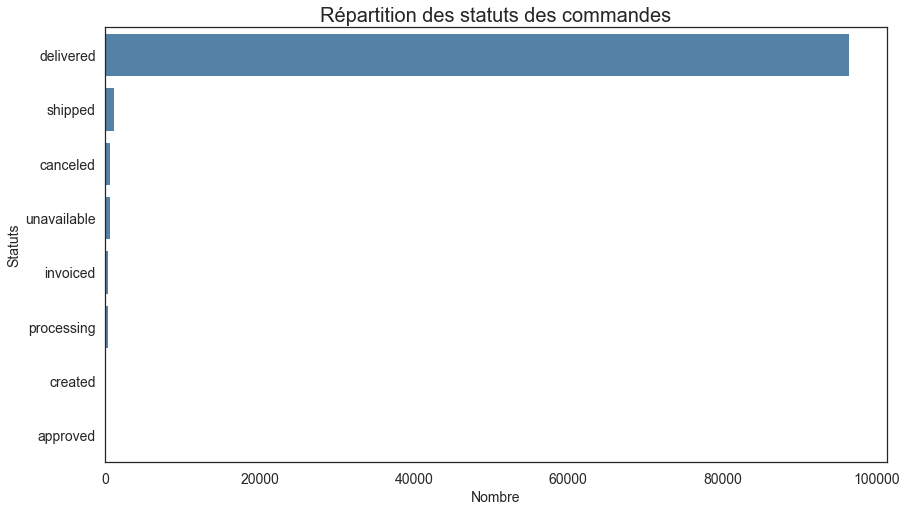

In [140]:
# Répartition des différents statuts des commandes
# ----------------------------------------------------------------------
serie_statuts_commandes = orders['order_status'].value_counts(sort=True)

# Countplot
plt.figure(figsize=(14, 8))
sns.barplot(x=serie_statuts_commandes.values,
            y=serie_statuts_commandes.index,
            color='SteelBlue')

plt.title('Répartition des statuts des commandes', fontsize=20)
plt.ylabel('Statuts'.title(), fontsize=14)
plt.xlabel('Nombre'.title(), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.show()

<AxesSubplot:title={'center':"Distribution de la date d'achat"}, xlabel='order_purchase_timestamp', ylabel='Fréquence de la donnée'>

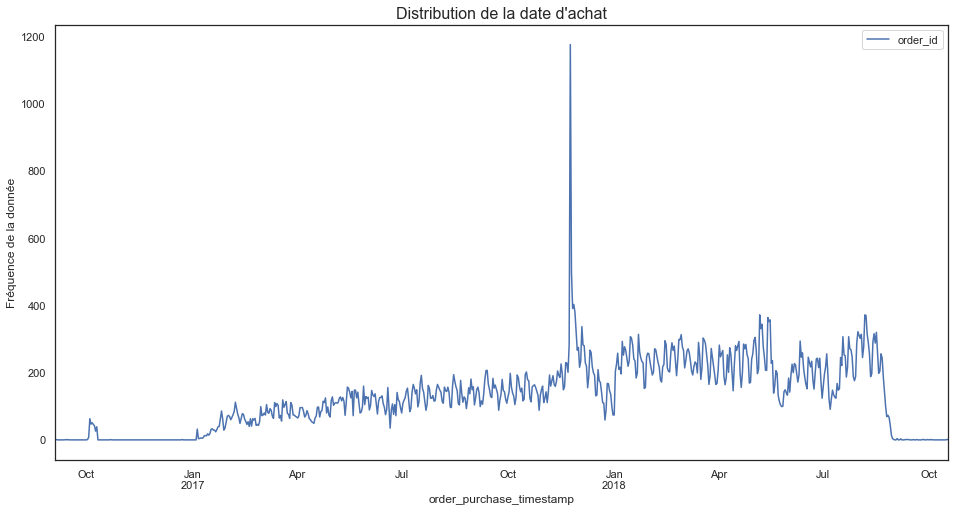

In [141]:
# Répartition des périodes de commandes

counts = orders.set_index("order_purchase_timestamp").\
                groupby(pd.Grouper(freq='D')).count()
fig = plt.figure(figsize=(16, 8))
plt.title("Distribution de la date d'achat", fontsize=16)
plt.ylabel("Fréquence de la donnée", fontsize=12)
ax = fig.gca()
counts.plot(y="order_id", use_index=True, ax=ax)

Très peu de commandes en 2016, augmentation régulière des commandes en 2017 avec un pic en novembre (achats de Noël?), puis une période un peu plus stable en 2018, avec une légère baisse pendant les congés d'été.

In [142]:
# Jour d'achat ?
# ----------------------------------------------------------------------
orders_works = orders.copy()
orders_works['order_purchase_day'] = orders_works['order_purchase_timestamp'] .apply(lambda x: x.strftime('%d'))

orders_works['order_purchase_dayofweek_label'] = orders.order_purchase_timestamp.apply(lambda x: x.dayofweek) \
    .map({0: 'Lun',
          1: 'Ma',
          2: 'Mer',
          3: 'Jeu',
          4: 'Ven',
          5: 'Sam',
          6: 'Di'})
fig = px.histogram(x=orders_works['order_purchase_dayofweek_label'],
                   y=orders_works['order_id'].value_counts(),
                   labels={'x': 'Jour', 'y': 'Nombre de commande'},
                   category_orders={'x': ['Lun', 'Ma', 'Mer', 'Jeu',
                                          'Ven', 'Sam', 'Di']})

fig.update_traces(marker_color='SteelBlue')

fig.update_layout(title={'text': 'Commandes journalières',
                         'y': 0.9,
                         'x': 0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  xaxis=dict(title='Jour',
                             linecolor="#CCC",
                             showgrid=True),
                  yaxis=dict(title='Montant',
                             linecolor="#CCC",
                             showgrid=True),
                  plot_bgcolor="#FFF")

fig.show()


On observe un nombre de commande élevé en début de semaine de **lundi à jeudi**. Le week-end, les commandes sur le site sont en baisse surtout le samedi.

Analyse des achats selon la période de la journée :

In [143]:
# fonction pour difinir les périodes de la journée 

def transfo_time_day(x):
    global time_day
    if (x > '0' and x <= '12'):
        time_day = "Matin"
    elif (x > '12' and x <= '18'):
        time_day = "Aprés_midi"
    else:
        time_day = "Nuit"
    return time_day

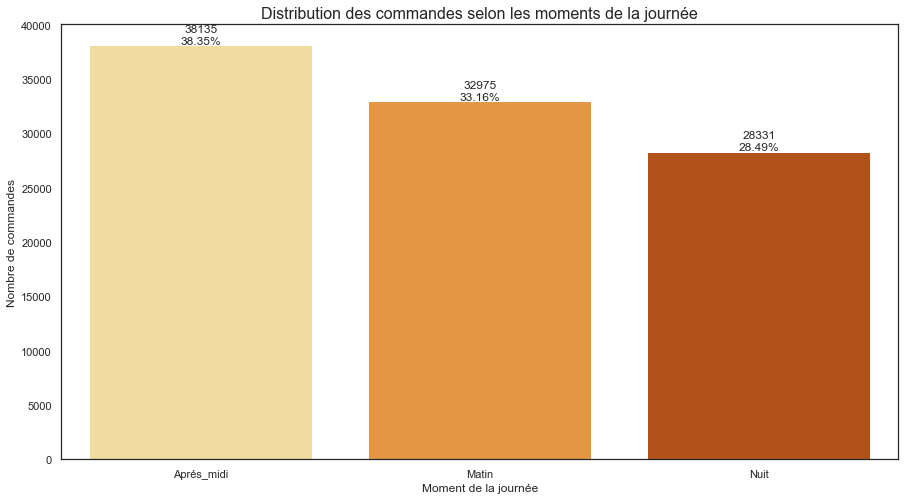

In [144]:
# ----------------------------------------------------------------------
# période d'achat 
# ----------------------------------------------------------------------
orders_works['order_purchase_hour'] = \
    orders_works['order_purchase_timestamp'] \
    .apply(lambda x: x.strftime('%H'))

orders_works["order_purchase_time_day"] = \
        orders_works["order_purchase_hour"].apply(transfo_time_day)

orders_works["order_purchase_dayofweek"] = \
        orders_works["order_purchase_timestamp"].dt.strftime("%a")

total = orders_works['order_purchase_dayofweek'].value_counts().sum()
plt.figure(figsize=(15, 8))

g = sns.countplot(x='order_purchase_time_day', data=orders_works,
                  palette="YlOrBr",
                  order=orders_works['order_purchase_time_day'].value_counts().index)
g.set_title("Distribution des commandes selon les moments de la journée",
            fontsize=16)
g.set_xlabel("Moment de la journée", fontsize=12)
g.set_ylabel("Nombre de commandes", fontsize=12)
for p in g.patches:
    height = p.get_height()
    #sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
           height + 100,
           '{:1.2f}%'.format(height/total*100),
           ha="center", fontsize=12)
    g.text(p.get_x()+p.get_width()/2.,
           height + 1200,
           '{:1}'.format(height),
           ha="center", fontsize=12)



On observe un nombre de commande élevé **l'après-midi**.

- Délais de livraison

In [145]:
# Délai entre la livraison réelle et la date de commande (en jours)
orders_works['delai_livraison'] = (orders_works['order_delivered_customer_date'] -
    orders_works['order_purchase_timestamp']).dt.days

<AxesSubplot:title={'center':'Délai entre la livraison réelle et la date de commande (en jours)'}, xlabel='Nombre de jours', ylabel='Frequency'>

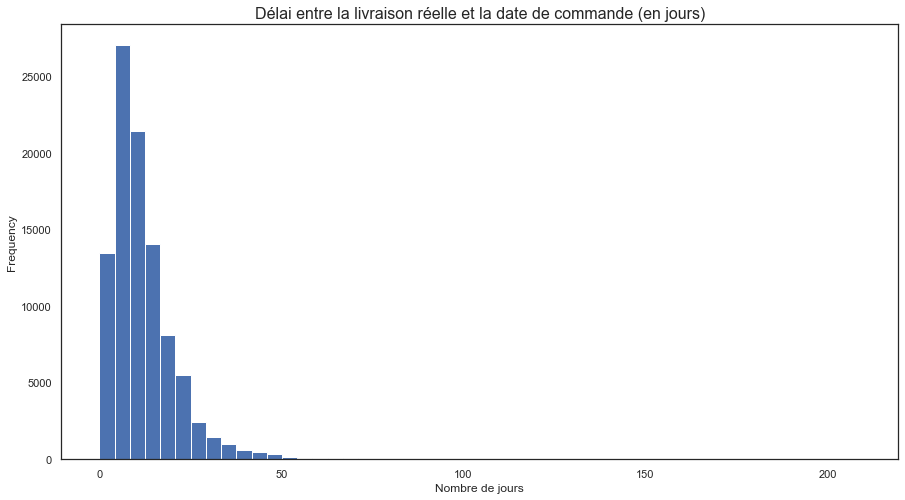

In [146]:

plt.title("Délai entre la livraison réelle et la date de commande (en jours)",fontsize=16)
plt.xlabel("Nombre de jours", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

orders_works['delai_livraison'].plot(kind='hist', bins=50, figsize=(15, 8))

In [147]:
delta = []
for elt in orders_works['delai_livraison']:
    
    if elt <= 0:
        delta.append(0)
    elif (elt > 0 and elt <= 5):
        delta.append(5)
    elif (elt > 5 and elt <= 10):
        delta.append(10)
    elif (elt > 10 and elt <= 20):
        delta.append(20)
    elif (elt > 20 and elt <= 30):
        delta.append(30)
    elif (elt > 30 and elt <= 40):
        delta.append(40)
    else:
        delta.append(50)

labels = ['Livré en avance ou le jour même', 'Livré entre 1 à 5 jours',
          'Livré entre 5 et 10 jours', 'Livré entre 10 et 20 jours',
          'Livré entre 20 et 30 jours', 'Livré entre 30 et 40 jours',
          'Livré après 40 jours']
fig = go.Figure(data=[go.Pie(labels=labels, values=delta)])
fig.update_layout(title="Précision de la durée de livraison en nombre de jours relatif")
fig.show()


Ecart entre la livraison réelle et prévue

In [148]:
# Ecart entre la livraison réelle et prévue (en jours d'avance)
orders_works['ecart_livraison_reel_annonce'] = ( orders_works['order_estimated_delivery_date'] -
    orders_works['order_delivered_customer_date']).dt.days

Le délai de livraison moyen est de 10 jours. De nombreux outliers sont constitués par les commandes annulées ou non disponibles.

<AxesSubplot:title={'center':'avance de livraison par jours '}, xlabel='Nombre de jours', ylabel='Frequency'>

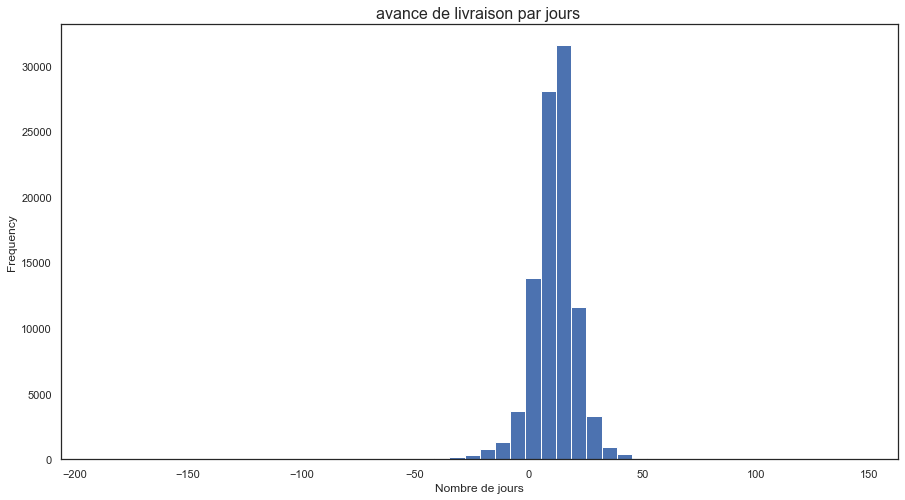

In [149]:
plt.title("avance de livraison par jours ",fontsize=16)
plt.xlabel("Nombre de jours", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)

orders_works['ecart_livraison_reel_annonce'].plot(kind='hist', bins=50, figsize=(15, 8))

En moyenne les commandes sont livrées 10 jours avant la date estimée transmise au client à titre indicatif. De nombreux outliers représentent les commandes annulées ou les commandes non disponibles.

q95 = 8 days 21:10:27.799999999


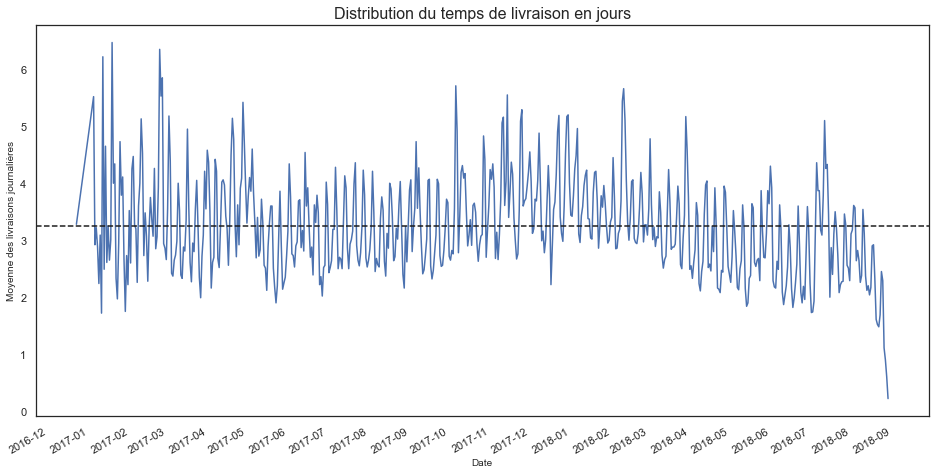

In [150]:
# Représentation du temps de livraison journalière sans les outliers (8 jours)
# ----------------------------------------------------------------------

# Préparation des données à afficher
orders_works['tps_livraison'] = orders_works['order_delivered_carrier_date'] - orders_works['order_purchase_timestamp']

q95 = orders_works['tps_livraison'].quantile(.95)
print(f'q95 = {q95}')

livraisons = orders_works[orders_works['order_status'] == 'delivered']
livraisons.set_index(orders_works[orders_works['order_status']
                                     == 'delivered']
                     ['order_purchase_timestamp'], inplace=True)

livraisons = livraisons.sort_index()
livraisons['livraison_secondes'] = livraisons['tps_livraison'] \
    .dt.total_seconds()
livraisons = livraisons['livraison_secondes'].resample("D").mean()
livraisons = round(livraisons/86400, 2)
# Suppression des outliers < q95
livraisons = livraisons[livraisons < 8]
moyenne_livraisons = livraisons.mean()

# Plot les données
ax = livraisons.plot(figsize=(16, 8))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.axhline(moyenne_livraisons, color="k", linestyle='--')
plt.title("Distribution du temps de livraison en jours", fontsize=16)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Moyenne des livraisons journalières', fontsize=10)
plt.grid(False)
plt.show()

### Infos sur les catégories des produits _ category _

In [151]:
category.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [152]:
# la structure des dataframes
data_structure(category)

Caractéristiques  Valeurs
0                   Nombre de lignes       71
1                 Nombre de colonnes        2
2  Nombre de variables catégorielles        2
3    Nombre de variables numériques         0
4  Pourcentage de données manquantes        0
5                 Nombre de doublons        0

In [153]:
# description des variables qualitatives/quantitatives
desc_var(category, type_var='all')

product_category_name product_category_name_english
type                  object                        object
nb_nan                   0.0                           0.0
%_nan                    0.0                           0.0
count                     71                            71
unique                    71                            71
top             beleza_saude                 health_beauty
freq                       1                             1

**Compréhension des variables**

- product_category_name : nom de la catégorie en portugais 
- product_category_name_english : nom de la catégorie en anglais 

**Bilan**

- 71 noms de catégories en portugais et en anglais.
- Pas de valeurs manquantes.

### Infos sur les produits _ products _

In [154]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [155]:
# la structure des dataframes
data_structure(products)

Caractéristiques  Valeurs
0                   Nombre de lignes    32951
1                 Nombre de colonnes        9
2  Nombre de variables catégorielles        2
3    Nombre de variables numériques         7
4  Pourcentage de données manquantes        7
5                 Nombre de doublons        0

In [156]:
# description des variables qualitatives/quantitatives
desc_var(products, type_var='all')

product_id product_category_name  \
type                              object                object   
nb_nan                               0.0                 610.0   
%_nan                                0.0              1.851234   
count                              32951                 32341   
unique                             32951                    73   
top     1e9e8ef04dbcff4541ed26657ea517e5       cama_mesa_banho   
freq                                   1                  3029   
mean                                 NaN                   NaN   
std                                  NaN                   NaN   
min                                  NaN                   NaN   
25%                                  NaN                   NaN   
50%                                  NaN                   NaN   
75%                                  NaN                   NaN   
max                                  NaN                   NaN   

       product_name_lenght product_description_lenght product_photos_qty  \
type               float64                    float64            float64   
nb_nan               610.0                      610.0              610.0   
%_nan             1.851234                   1.851234           1.851234   
count              32341.0                    32341.0            32341.0   
unique                 NaN                        NaN                NaN   
top                    NaN                        NaN                NaN   
freq                   NaN                        NaN                NaN   
mean             48.476949                 771.495285           2.188986   
std              10.245741                 635.115225           1.736766   
min                    5.0                        4.0                1.0   
25%                   42.0                      339.0                1.0   
50%                   51.0                      595.0                1.0   
75%                   57.0                      972.0                3.0   
max                   76.0                     3992.0               20.0   

       product_weight_g product_length_cm product_height_cm product_width_cm  
type            float64           float64           float64          float64  
nb_nan              2.0               2.0               2.0              2.0  
%_nan           0.00607           0.00607           0.00607          0.00607  
count           32949.0           32949.0           32949.0          32949.0  
unique              NaN               NaN               NaN              NaN  
top                 NaN               NaN               NaN              NaN  
freq                NaN               NaN               NaN              NaN  
mean        2276.472488         30.815078         16.937661        23.196728  
std         4282.038731         16.914458         13.637554        12.079047  
min                 0.0               7.0               2.0              6.0  
25%               300.0              18.0               8.0             15.0  
50%               700.0              25.0              13.0             20.0  
75%              1900.0              38.0              21.0             30.0  
max             40425.0             105.0             105.0            118.0

**Compréhension des variables**


- product_id : identifiant unique du produit 
- product_category_name : La catégorie de produit, en portugais 
- product_name_lenght : nombre de caractères extraits du nom du produit 
- product_description_lenght : nombre de caractères extraits de la description du produit 
- product_photos_qty : nombre de photos de produits publiées 
- product_weight_g : poids du produit mesuré en grammes 
- product_length_cm : longueur du produit mesurée en centimètres 
- product_height_cm : la hauteur du produit mesurée en centimètres 
- product_width_cm : largeur du produit mesurée en centimètres 

- Traduction des noms de catégories des produits de portugais à anglais

In [157]:

# Fusion avec le jeu de données df_translation mais 71 catégories
# et 73 catégories dans df_products ==> 2 catégories à traduire
products = products.merge( category, on='product_category_name', how="left")



In [158]:
# Recherche des 2 catégories non traduites en anglais?
products[products['product_category_name_english']
            .isna() & products['product_category_name']
            .notnull()][['product_category_name',
                         'product_category_name_english']]

product_category_name  \
1628                                        pc_gamer   
5821   portateis_cozinha_e_preparadores_de_alimentos   
7325   portateis_cozinha_e_preparadores_de_alimentos   
7478                                        pc_gamer   
8819   portateis_cozinha_e_preparadores_de_alimentos   
11039  portateis_cozinha_e_preparadores_de_alimentos   
14266  portateis_cozinha_e_preparadores_de_alimentos   
16182  portateis_cozinha_e_preparadores_de_alimentos   
16930                                       pc_gamer   
17800  portateis_cozinha_e_preparadores_de_alimentos   
18610  portateis_cozinha_e_preparadores_de_alimentos   
26890  portateis_cozinha_e_preparadores_de_alimentos   
29919  portateis_cozinha_e_preparadores_de_alimentos   

      product_category_name_english  
1628                            NaN  
5821                            NaN  
7325                            NaN  
7478                            NaN  
8819                            NaN  
11039                           NaN  
14266                           NaN  
16182                           NaN  
16930                           NaN  
17800                           NaN  
18610                           NaN  
26890                           NaN  
29919                           NaN

In [159]:
# Imputation des valeurs manquantes de product_category_name_english

products.loc[(products['product_category_name'] == 'pc_gamer'),
                'product_category_name_english'] = 'pc_gamer'
products.loc[(products['product_category_name'] ==
                 'portateis_cozinha_e_preparadores_de_alimentos'),
                'product_category_name_english'] = \
                'kitchen_laptops_and_food_preparers'

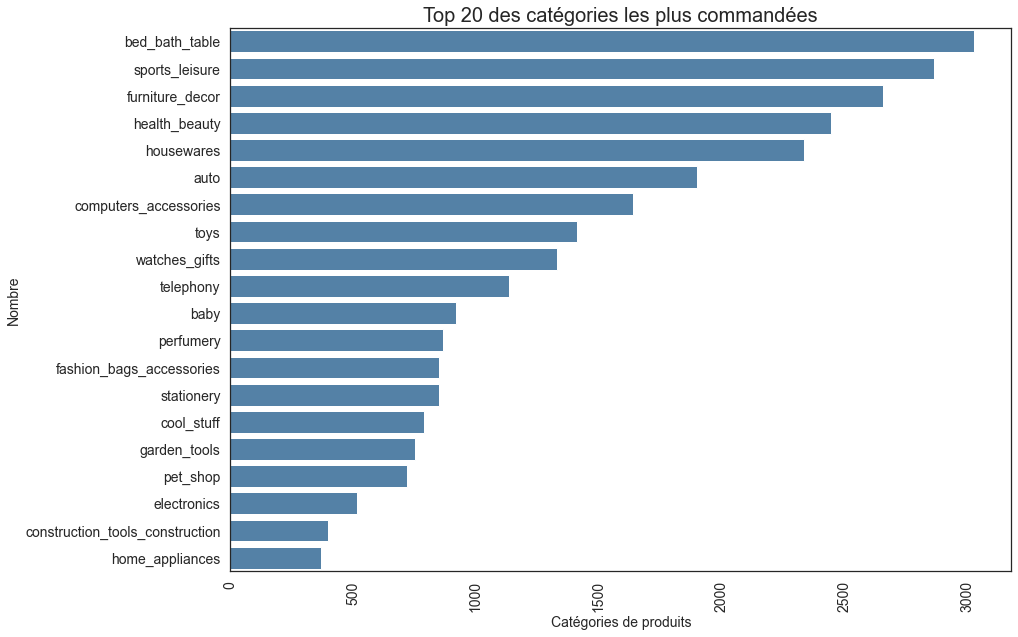

In [160]:
# Top 20 des catégories les plus commandées
# ----------------------------------------------------------------------
top_20_produits = products.groupby(
    ['product_id', 'product_category_name_english']).count().reset_index()

# Countplot
plt.figure(figsize=(14, 10))
sns.countplot(y=top_20_produits.product_category_name_english,
              data=top_20_produits,
              order=top_20_produits.product_category_name_english
              .value_counts().head(20).index,
              color='SteelBlue')

plt.title('Top 20 des catégories les plus commandées', fontsize=20)
plt.ylabel('Nombre', fontsize=14)
plt.xlabel('Catégories de produits', fontsize=14)
plt.xticks(rotation=90)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)

In [161]:
products['product_category_name_english'].unique().tolist()

['perfumery',
 'art',
 'sports_leisure',
 'baby',
 'housewares',
 'musical_instruments',
 'cool_stuff',
 'furniture_decor',
 'home_appliances',
 'toys',
 'bed_bath_table',
 'construction_tools_safety',
 'computers_accessories',
 'health_beauty',
 'luggage_accessories',
 'garden_tools',
 'office_furniture',
 'auto',
 'electronics',
 'fashion_shoes',
 'telephony',
 'stationery',
 'fashion_bags_accessories',
 'computers',
 'home_construction',
 'watches_gifts',
 'construction_tools_construction',
 'pet_shop',
 'small_appliances',
 'agro_industry_and_commerce',
 nan,
 'furniture_living_room',
 'signaling_and_security',
 'air_conditioning',
 'consoles_games',
 'books_general_interest',
 'costruction_tools_tools',
 'fashion_underwear_beach',
 'fashion_male_clothing',
 'kitchen_dining_laundry_garden_furniture',
 'industry_commerce_and_business',
 'fixed_telephony',
 'construction_tools_lights',
 'books_technical',
 'home_appliances_2',
 'party_supplies',
 'drinks',
 'market_place',
 'la_cuisi

In [162]:
# Regroupement des catégories : de 73 modalités à modalités
dico_categories = {
 
# health & beauty
 'health_beauty':"health_beauty",
 'perfumery':"health_beauty",

# computers & electronics
 'computers_accessories':"computers_electronics",
 'telephony':"computers_electronics",
 'watches_gifts':"computers_electronics",
 'tablets_printing_image':"computers_electronics",
 'fixed_telephony':"computers_electronics",
 'consoles_games':"computers_electronics",
 'audio':"computers_electronics",
 'electronics':"computers_electronics",
 'small_appliances':"computers_electronics",
 'computers':"computers_electronics",
    
# auto   
 'auto':"auto",
 
# home   
 'bed_bath_table':"home",
 'furniture_decor':"home",
 'housewares':"home",
 'air_conditioning':"home",
 'furniture_mattress_and_upholstery':"home",
 'furniture_living_room':"home",
 'kitchen_dining_laundry_garden_furniture':"home",
 'home_appliances':"home",
 'home_confort':"home",
 'furniture_bedroom':"home", 
 'la_cuisine':"home",
 'home_appliances_2':"home", 
 'home_comfort_2':"home",
 'small_appliances_home_oven_and_coffee':"home",

      
# food & drink
 'food_drink':"food_drink",
 'drinks':"food_drink",
 'food':"food_drink",
 
# Children   
 'baby':"children",
 'toys':"children",  
 'fashion_childrens_clothes':"children",
 'diapers_and_hygiene':"children",
    
    

# pet & garden
 'garden_tools':"pet_garden",
 'costruction_tools_garden':"pet_garden",
 'flowers':"pet_garden",
 'pet_shop':"pet_garden",
 
# fashion
 'fashion_shoes':"fashion",
 'luggage_accessories':"fashion",
 'fashion_bags_accessories':"fashion", 
 'fashion_male_clothing':"fashion",
 'fashion_underwear_beach':"fashion",
 'fashion_sport':"fashion",
 'fashio_female_clothing':"fashion",
 
# construction    
 'construction_tools_construction':"construction",
 'costruction_tools_tools':"construction",
 'home_construction':"construction",
 'construction_tools_lights':"construction",
 'construction_tools_safety':"construction",


# party
 'party_supplies':"party",
 'christmas_supplies':"party",

# office
 'stationery':"office",
 'office_furniture':"office",
 'agro_industry_and_commerce':"office",
 'industry_commerce_and_business':"office",
 'signaling_and_security':"office",
 'security_and_services':"office",


# culture & entertainment
  'art':"culture_entertainment",
 'books_technical':"culture_entertainment",
 'books_general_interest':"culture_entertainment",
 'books_imported':"culture_entertainment",
 'cine_photo':"culture_entertainment",
 'music':"culture_entertainment", 
 'cds_dvds_musicals':"culture_entertainment",
 'dvds_blu_ray':"culture_entertainment",
 'musical_instruments':"culture_entertainment", 
 'sports_leisure':"culture_entertainment",
 'arts_and_craftmanship':"culture_entertainment",
 
# other   
 'cool_stuff':"other",
 'market_place':"other",
}

In [163]:
# Regroupement des modalités
products['product_category_name_english'] = products['product_category_name_english'].map(dico_categories)

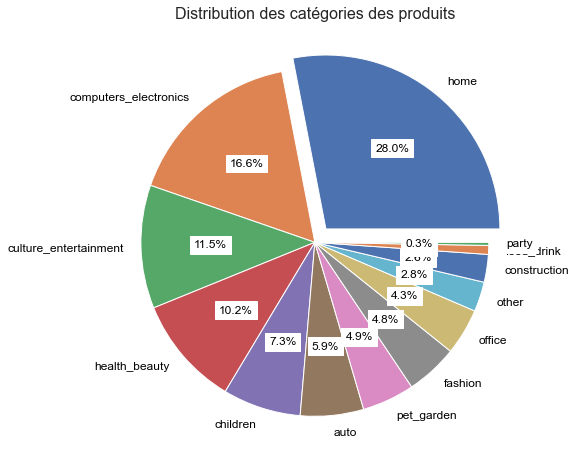

In [164]:
# Pieplot de représentation des catégories de produits
colors_niveau = ['Crimson', 'LightGreen', 'Tan', 'Turquoise', 'Violet',
                 'Moccasin', 'Aqua']

plt.figure(figsize=(15, 8))
plt.title('Distribution des catégories des produits', size=16)
nb_par_var = products['product_category_name_english'].sort_values().value_counts()
 # nb_par_var = nb_par_var.loc[sorted(nb_par_var.index)]
explode = [0.1]
for i in range(len(nb_par_var) - 1):
        explode.append(0)
wedges, texts, autotexts = plt.pie(
        nb_par_var, labels=nb_par_var.index, autopct='%1.1f%%',  textprops={
            'fontsize': 12, 'color': 'black', 'backgroundcolor': 'w'}, explode=explode)

**Bilan** 

- Les modalités ont été regroupées pour passer de 73 catégories à 13 catégories .
- les prouits dans la categorie **home** sont les plus commandé 

### Infos sur les vendeurs _ sellers _

In [165]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [166]:
# la structure des dataframes
data_structure(sellers)

Caractéristiques  Valeurs
0                   Nombre de lignes     3095
1                 Nombre de colonnes        4
2  Nombre de variables catégorielles        3
3    Nombre de variables numériques         1
4  Pourcentage de données manquantes        0
5                 Nombre de doublons        0

In [167]:
# description des variables qualitatives/quantitatives
desc_var(sellers, type_var='all')

seller_id seller_zip_code_prefix seller_city  \
type                              object                float64      object   
nb_nan                               0.0                    0.0         0.0   
%_nan                                0.0                    0.0         0.0   
count                               3095                 3095.0        3095   
unique                              3095                    NaN         611   
top     3442f8959a84dea7ee197c632cb2df15                    NaN   sao paulo   
freq                                   1                    NaN         694   
mean                                 NaN           32291.059451         NaN   
std                                  NaN            32713.45383         NaN   
min                                  NaN                 1001.0         NaN   
25%                                  NaN                 7093.5         NaN   
50%                                  NaN                14940.0         NaN   
75%                                  NaN                64552.5         NaN   
max                                  NaN                99730.0         NaN   

       seller_state  
type         object  
nb_nan          0.0  
%_nan           0.0  
count          3095  
unique           23  
top              SP  
freq           1849  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

**Compréhension des variables**

- seller_id : identifiant unique du vendeur 
- seller_zip_code_prefix : les 5 premiers chiffres du code postal du vendeur 
- seller_city : ville du vendeur 
- seller_state : État du vendeur 

seller_zip_code_prefix


seller_zip_code_prefix- code postal de la ville de résidence du vendeur (5 chiffres)

Le code postal est défini comme un entier : à transformer en objet et on doit compléter à gauche par des zéros

In [168]:


# Transformation de int64 en object et suppression '.0'
sellers['seller_zip_code_prefix'] =sellers['seller_zip_code_prefix'].astype('object') \
    .apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].str.rjust(5, '0')
# Transformation de int64 en object et suppression '.0'
sellers['seller_zip_code_prefix'] =sellers['seller_zip_code_prefix'].astype('object') \
    .apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
sellers['seller_zip_code_prefix'] = sellers['seller_zip_code_prefix'].str.rjust(5, '0')

Répartition du nombre de vendeurs par état

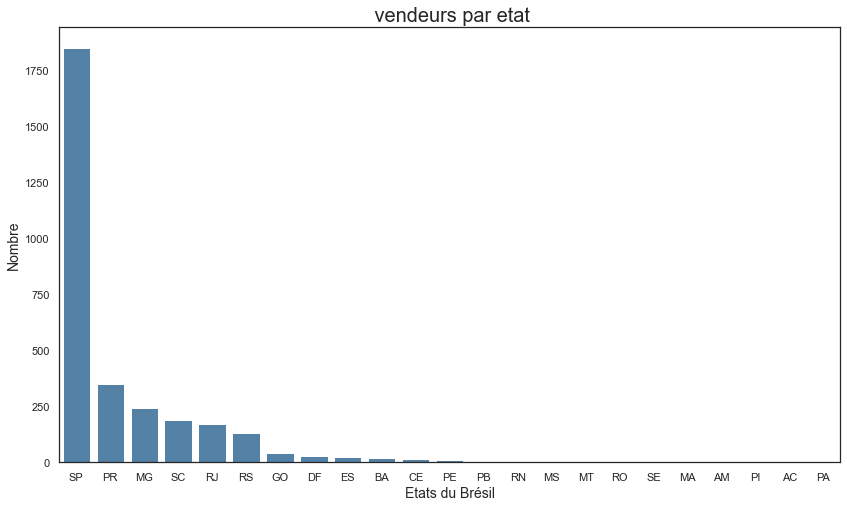

In [169]:
# Répartition du nombre de vendeurs par état du Brésil
# -----------------------------------------------------------------------
vendurs_par_etat = sellers.groupby(['seller_id', 'seller_state']).count().reset_index()

# Countplot
plt.figure(figsize=(14, 8))
sns.countplot(x=vendurs_par_etat.seller_state, data=vendurs_par_etat,
              order=vendurs_par_etat.seller_state.value_counts().index,
              color='SteelBlue')

plt.title(' vendeurs par etat', fontsize=20)
plt.ylabel('Nombre', fontsize=14)
plt.xlabel('Etats du Brésil', fontsize=14)


plt.grid(False)
plt.show()

**Bilan**


La plupart des vendeurs sont localisés dans les 6 états :
- SP : São Paulo,
- MG : Minas Gerais,
- PR : Parana,


### Infos sur l'évaluation des produits _ reviews _

In [170]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [171]:
# la structure des dataframes
data_structure(reviews)

Caractéristiques  Valeurs
0                   Nombre de lignes    99224
1                 Nombre de colonnes        7
2  Nombre de variables catégorielles        6
3    Nombre de variables numériques         1
4  Pourcentage de données manquantes      147
5                 Nombre de doublons        0

In [172]:
# description des variables qualitatives/quantitatives
desc_var(reviews, type_var='all')

review_id                          order_id  \
type                              object                            object   
nb_nan                               0.0                               0.0   
%_nan                                0.0                               0.0   
count                              99224                             99224   
unique                             98410                             98673   
top     7b606b0d57b078384f0b58eac1d41d78  c88b1d1b157a9999ce368f218a407141   
freq                                   3                                 3   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       review_score review_comment_title review_comment_message  \
type        float64               object                 object   
nb_nan          0.0              87656.0                58247.0   
%_nan           0.0             88.34153              58.702532   
count       99224.0                11568                  40977   
unique          NaN                 4527                  36159   
top             NaN            Recomendo              Muito bom   
freq            NaN                  423                    230   
mean       4.086421                  NaN                    NaN   
std        1.347579                  NaN                    NaN   
min             1.0                  NaN                    NaN   
25%             4.0                  NaN                    NaN   
50%             5.0                  NaN                    NaN   
75%             5.0                  NaN                    NaN   
max             5.0                  NaN                    NaN   

       review_creation_date review_answer_timestamp  
type                 object                  object  
nb_nan                  0.0                     0.0  
%_nan                   0.0                     0.0  
count                 99224                   99224  
unique                  636                   98248  
top     2017-12-19 00:00:00     2017-06-15 23:21:05  
freq                    463                       4  
mean                    NaN                     NaN  
std                     NaN                     NaN  
min                     NaN                     NaN  
25%                     NaN                     NaN  
50%                     NaN                     NaN  
75%                     NaN                     NaN  
max                     NaN                     NaN

**Compréhension des variables**

- review_id : identifiant unique des avis 
- order_id : identifiant unique de la commande 
- review_score : Note allant de 1 à 5 donnée par le client dans une enquête de satisfaction.
- review_comment_title : Titre du commentaire laissé par le client, en portugais
- review_comment_message : Message de commentaire de l'avis laissé par le client, en portugais.
- review_creation_date : Indique la date à laquelle l'enquête de satisfaction a été envoyée au client. 
- review_answer_timestamp : Indique l'horodatage de la réponse à l'enquête de satisfaction. 

Répartition des notes

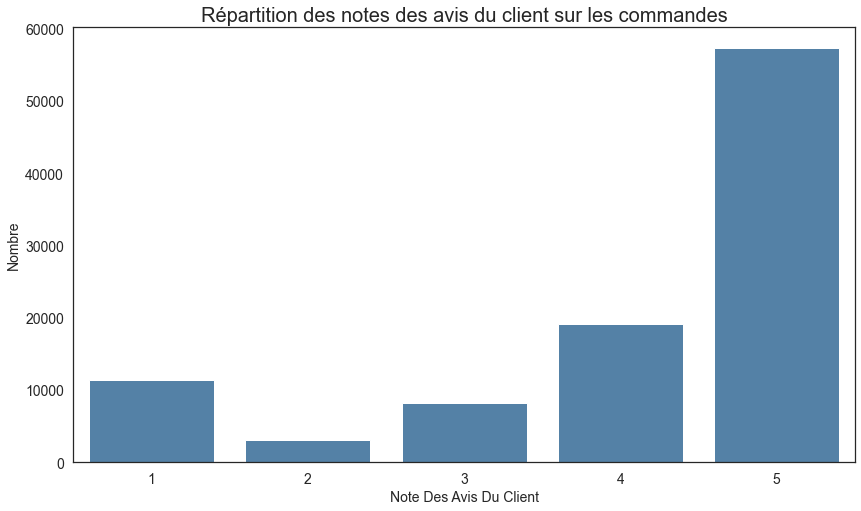

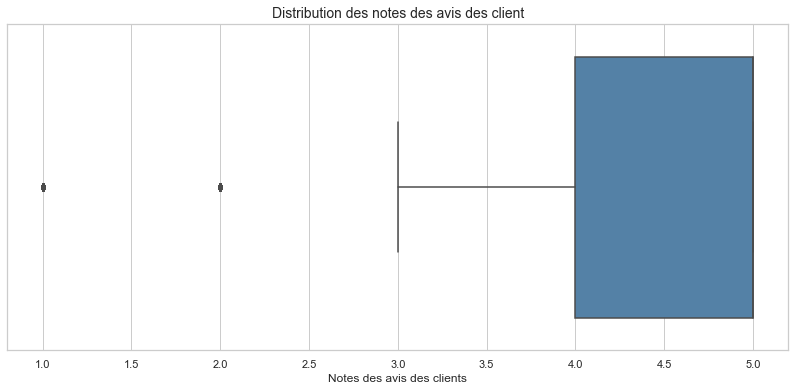

In [173]:


# Répartition des notes des avis sur les commandes
# ----------------------------------------------------------------------
serie_notes_avis = reviews['review_score'].value_counts(sort=False)

# Countplot
plt.figure(figsize=(14, 8))
sns.barplot(x=serie_notes_avis.index, y=serie_notes_avis.values,
            color='SteelBlue')

plt.title('Répartition des notes des avis du client sur les commandes',
          fontsize=20)
plt.ylabel('Nombre'.title(), fontsize=14)
plt.xlabel('Note des avis du client'.title(), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Boxplot des notes des avis sur les commandes
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 6))

sns.set(style='whitegrid')
sns.boxplot(data=reviews['review_score'], orient='h',
            color='SteelBlue')
plt.title('Distribution des notes des avis des client', fontsize=14)
plt.xlabel('Notes des avis des clients')
plt.yticks([])
plt.show()

La majorité des commandes sont bien notées 

In [174]:
# Transformer review_creation_date et review_answer_timestamp en Datetime
cols = ['review_creation_date', 'review_answer_timestamp']
for col in cols:
    reviews[col] = pd.to_datetime(reviews[col], format='%Y-%m-%d %H:%M:%S')

In [175]:
# Suppression des variables inutiles pour notre étude
# On conserve les notes d'évaluation et les variables nécssaires à la
# jointure
reviews = reviews.drop(['review_comment_title',
                              'review_comment_message',
                              'review_creation_date',
                              'review_answer_timestamp'],
                             axis=1)

### Infos sur la géolocalisation _ geo _

In [176]:
geo.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [177]:
# la structure des dataframes
data_structure(geo )

Caractéristiques  Valeurs
0                   Nombre de lignes  1000163
1                 Nombre de colonnes        5
2  Nombre de variables catégorielles        2
3    Nombre de variables numériques         3
4  Pourcentage de données manquantes        0
5                 Nombre de doublons   261831

In [178]:
# description des variables qualitatives/quantitatives
desc_var(geo , type_var='all')

geolocation_zip_code_prefix geolocation_lat geolocation_lng  \
type                       float64         float64         float64   
nb_nan                         0.0             0.0             0.0   
%_nan                          0.0             0.0             0.0   
count                    1000163.0       1000163.0       1000163.0   
unique                         NaN             NaN             NaN   
top                            NaN             NaN             NaN   
freq                           NaN             NaN             NaN   
mean                  36574.166466      -21.176153      -46.390541   
std                    30549.33571        5.715866        4.269748   
min                         1001.0      -36.605374     -101.466766   
25%                        11075.0      -23.603546      -48.573172   
50%                        26530.0      -22.919377      -46.637879   
75%                        63504.0       -19.97962      -43.767709   
max                        99990.0       45.065933      121.105394   

       geolocation_city geolocation_state  
type             object            object  
nb_nan              0.0               0.0  
%_nan               0.0               0.0  
count           1000163           1000163  
unique             8011                27  
top           sao paulo                SP  
freq             135800            404268  
mean                NaN               NaN  
std                 NaN               NaN  
min                 NaN               NaN  
25%                 NaN               NaN  
50%                 NaN               NaN  
75%                 NaN               NaN  
max                 NaN               NaN

**Compréhension des variables** :

- geolocation_zip_code_prefix : Code postal 
- geolocation_lat : Latitude 
- geolocation_lng : Longitude 
- geolocation_city : Ville 
- geolocation_state : État 

suppression de doublon

In [179]:
#suppression de doublons 
geo=geo.drop_duplicates(subset=['geolocation_zip_code_prefix'])


Le code postal est défini comme un entier : à transformer en objet et on doit compléter à gauche par des zéros.

In [180]:
geo['geolocation_zip_code_prefix'] =geo['geolocation_zip_code_prefix'].astype('object') \
    .apply(lambda x: str(x).replace('.0', ''))

# Transformation de int64 en object et suppression '.0'
geo ['geolocation_zip_code_prefix'] = \
    geo['geolocation_zip_code_prefix'] \
    .astype('object').apply(lambda x: str(x).replace('.0', ''))
# Compléter le code postal par des zéros à gauche pour contenir 5 chiffres
geo ['geolocation_zip_code_prefix'] = \
    geo ['geolocation_zip_code_prefix'].str.rjust(5, '0')


In [181]:
geo.dtypes

geolocation_zip_code_prefix     object
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object

Répartition du nombre de clients par état du Brésil

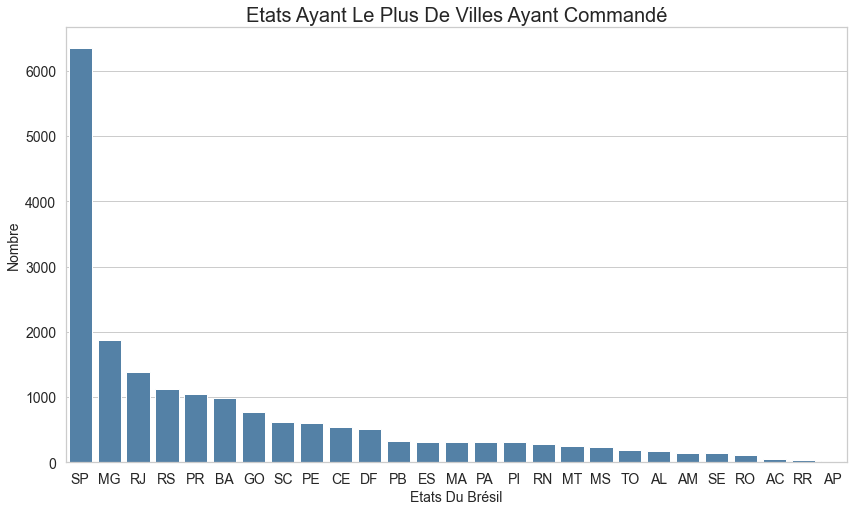

In [182]:
# Répartition du nombre de clients par état du Brésil
# -----------------------------------------------------------------------

# Countplot
plt.figure(figsize=(14, 8))
sns.countplot(x='geolocation_state', data=geo,
              order=geo['geolocation_state'].value_counts(
              ).sort_values(ascending=False).index,
              color='SteelBlue')

plt.title('Etats ayant le plus de villes ayant commandé'.title(),
          fontsize=20)
plt.ylabel('Nombre'.title(), fontsize=14)
plt.xlabel('Etats du Brésil'.title(), fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Infos sur les items _ items _

In [183]:
items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [184]:
# la structure des dataframes
data_structure(items )

Caractéristiques  Valeurs
0                   Nombre de lignes   112650
1                 Nombre de colonnes        7
2  Nombre de variables catégorielles        4
3    Nombre de variables numériques         3
4  Pourcentage de données manquantes        0
5                 Nombre de doublons        0

In [185]:
# description des variables qualitatives/quantitatives
desc_var(items , type_var='all')

order_id order_item_id  \
type                              object       float64   
nb_nan                               0.0           0.0   
%_nan                                0.0           0.0   
count                             112650      112650.0   
unique                             98666           NaN   
top     8272b63d03f5f79c56e9e4120aec44ef           NaN   
freq                                  21           NaN   
mean                                 NaN      1.197834   
std                                  NaN      0.705124   
min                                  NaN           1.0   
25%                                  NaN           1.0   
50%                                  NaN           1.0   
75%                                  NaN           1.0   
max                                  NaN          21.0   

                              product_id                         seller_id  \
type                              object                            object   
nb_nan                               0.0                               0.0   
%_nan                                0.0                               0.0   
count                             112650                            112650   
unique                             32951                              3095   
top     aca2eb7d00ea1a7b8ebd4e68314663af  6560211a19b47992c3666cc44a7e94c0   
freq                                 527                              2033   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        shipping_limit_date       price freight_value  
type                 object     float64       float64  
nb_nan                  0.0         0.0           0.0  
%_nan                   0.0         0.0           0.0  
count                112650    112650.0      112650.0  
unique                93318         NaN           NaN  
top     2017-07-21 18:25:23         NaN           NaN  
freq                     21         NaN           NaN  
mean                    NaN  120.653739      19.99032  
std                     NaN  183.633928     15.806405  
min                     NaN        0.85           0.0  
25%                     NaN        39.9         13.08  
50%                     NaN       74.99         16.26  
75%                     NaN       134.9         21.15  
max                     NaN      6735.0        409.68

**Compréhension des variables**

- order_id : identifiant unique de la commande 
- order_item_id : numéro séquentiel identifiant le nombre d'articles inclus dans le même ordre 
- product_id : identifiant unique du produit 
- seller_id : identifiant unique du vendeur 
- shipping_limit_date: Indique la date limite d'expédition du vendeur pour le transfert de la commande au partenaire logistique.
- price :prix de l'article 
- freight_value :frais de livraison 

In [186]:
# Transformer shipping_limit_date de object en Datetime
items['shipping_limit_date'] = pd.to_datetime(items['shipping_limit_date'], format='%Y-%m-%d %H:%M:%S')

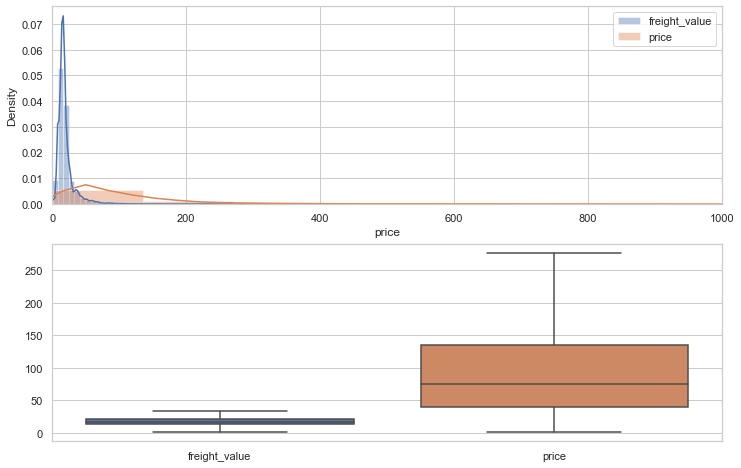

In [187]:
fig = plt.figure(1, figsize=(12, 8))

# Histogramme freight value et prix
plt.subplot(211)
sns.distplot(items["freight_value"], label="freight_value")
sns.distplot(items["price"], label="price")
plt.legend()
# x-axis limits
plt.xlim([0, 1000])

# Boxplot freight value et prix
plt.subplot(212)
sns.boxplot(data=items, order=["freight_value", "price"], showfliers=False)
plt.show()

##  Préparation du dataframe d'étude

Tous les fichiers de données présentés précédemment sont liés les uns aux autres par des colonnes communes qui permettent de faire des jointures

Les liens entre chaque fichier de données sont présentés ci-dessous :

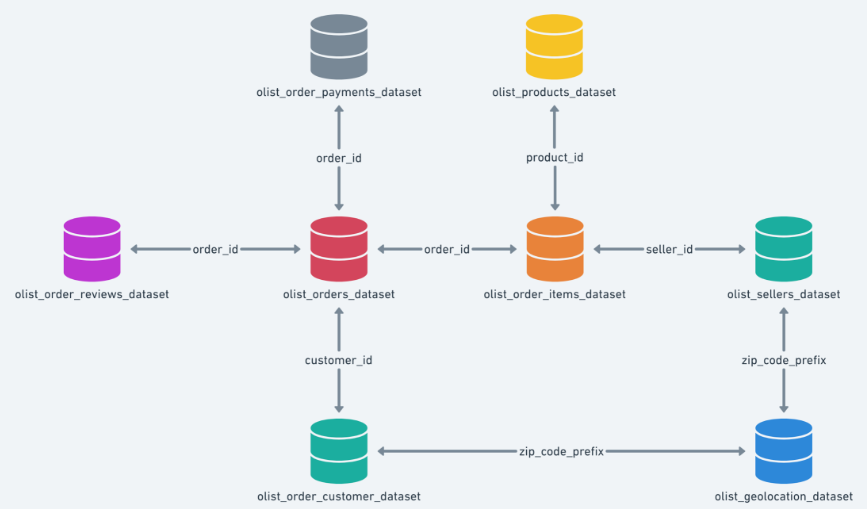


Les variables clés essentielles pour la fusion des jeux de données sont :

- customers_id,
- order_id,
- product_id,
- seller_id,
- zip_code_prefix,
- product_category_name.


 ## Concaténation des données et nettoyage

### Concaténation des données

In [188]:
#Fusion 1 : Clients/Commandes

df_ = pd.merge(customers,orders, on='customer_id', how='left')

#Fusion 2 : Clients/Geolocalisation

df_ = pd.merge(df_, geo, left_on='customer_zip_code_prefix',
               right_on='geolocation_zip_code_prefix', how='left')

# Fusion n°3 : Commandes/Avis sur la commande

df_ = pd.merge(df_, reviews, on='order_id', how='left')

#Fusion n°4 : Commandes/Articles commandés

df_ = pd.merge(df_,items, on='order_id', how='left')

#Fusion n°5 : Commandes/Paiements

df_ = pd.merge(df_, payments, on='order_id', how='left')

#Fusion n°6 : Articles Commandés/Produits

df_ = pd.merge(df_, products, on='product_id', how='left')
df_.shape

(119143, 38)

In [189]:
df_.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'geolocation_zip_code_prefix',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'review_id', 'review_score', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

In [190]:
data=df_.copy()

In [191]:
scores = pd.crosstab(data['order_status'],
                     data['review_score'])
scores

review_score    1.0   2.0   3.0    4.0    5.0
order_status                                 
approved          2     0     0      1      0
canceled        501    61    52     27     89
created           2     0     0      0      1
delivered     13118  3899  9649  22150  66046
invoiced        272    34    18     20     28
processing      306    32    12      7     13
shipped         732    85   127     94    130
unavailable     495    51    36     20     36

Text(0.5, 0.98, 'Distribution de scores ')

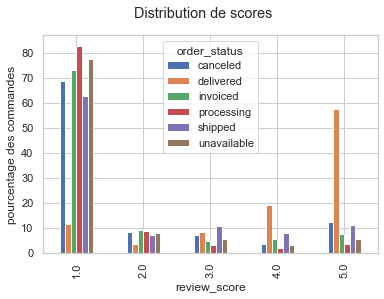

In [192]:
scores.drop(['approved', 'created']).apply(lambda row: 100*row /
                                           row.sum(), axis=1).T.plot(kind='bar', stacked=False)
plt.ylabel('pourcentage des commandes')
plt.suptitle('Distribution de scores ')

- **Filtre conservant uniquement les commandes livrées**


Pour la suite du projet, nous nous intéressons
qu'aux commandes qui ont été livrées.
Je filtre les autres commandes (envoyées, annulées, ...)

In [193]:
data = data[data['order_status'] == 'delivered']
# Suppression de la variable statut inutile après le filtre
data = data.drop(['order_status'], axis=1)

 ### Analyse et nettoyage

In [194]:
# Fonction pour afficher le pourcentage des valeurs nulls et les visualiser 

def valeur_null (df, pourcentage,heatmap):
   

    # 1. Nombre de valeurs manquantes totales
    nb_nan_tot = df.isna().sum().sum()
    nb_donnees_tot = np.product(df.shape)
    pourc_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)
    print(
        f'Valeurs manquantes :{nb_nan_tot} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

    if pourcentage:
        print("-------------------------------------------------------------")
        print("Nombre et pourcentage de valeurs manquantes par variable\n")
        # 2. Visualisation du nombre et du pourcentage de valeurs manquantes
        # par variable
        values = df.isnull().sum()
        percentage = 100 * values / len(df)
        table = pd.concat([values, percentage.round(2)], axis=1)
        table.columns = [
            'Nombres de valeurs manquantes',
            '% de valeurs manquantes']
        display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values('% de valeurs manquantes', ascending=False)
               )
    

    if heatmap:
        print("-------------------------------------------------------------")
        print("Heatmap de visualisation des valeurs manquantes")
        # 3. Heatmap de visualisation des valeurs manquantes
        plt.figure(figsize=(20, 10))
        sns.heatmap(df.isna(), cbar=False)
        plt.show()

Valeurs manquantes :11567 NaN pour 4281751 données (0.27 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Nombres de valeurs manquantes  \
product_category_name_english                           1661   
product_description_lenght                              1638   
product_photos_qty                                      1638   
product_category_name                                   1638   
product_name_lenght                                     1638   
review_id                                                861   
review_score                                             861   
geolocation_zip_code_prefix                              303   
geolocation_lat                                          303   
geolocation_lng                                          303   
geolocation_city                                         303   
geolocation_state                                        303   
product_width_cm                                          20   
product_height_cm                                         20   
product_length_cm                                         20   
product_weight_g                                          20   
order_approved_at                                         15   
order_delivered_customer_date                              8   
payment_value                                              3   
payment_installments                                       3   
order_delivered_carrier_date                               2   
payment_sequential                                         3   
payment_type                                               3   

                               % de valeurs manquantes  
product_category_name_english                     1.44  
product_description_lenght                        1.42  
product_photos_qty                                1.42  
product_category_name                             1.42  
product_name_lenght                               1.42  
review_id                                         0.74  
review_score                                      0.74  
geolocation_zip_code_prefix                       0.26  
geolocation_lat                                   0.26  
geolocation_lng                                   0.26  
geolocation_city                                  0.26  
geolocation_state                                 0.26  
product_width_cm                                  0.02  
product_height_cm                                 0.02  
product_length_cm                                 0.02  
product_weight_g                                  0.02  
order_approved_at                                 0.01  
order_delivered_customer_date                     0.01  
payment_value                                     0.00  
payment_installments                              0.00  
order_delivered_carrier_date                      0.00  
payment_sequential                                0.00  
payment_type                                      0.00

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


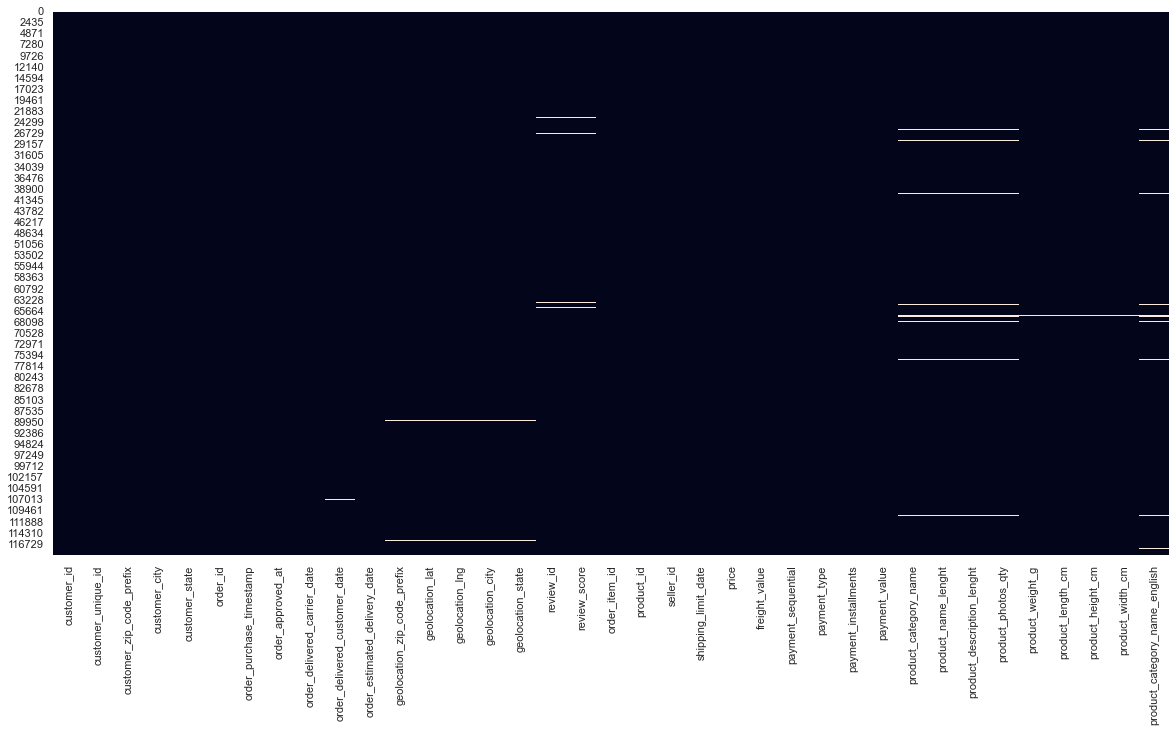

In [195]:
valeur_null (data, True,True)

In [196]:
# description des variables qualitatives/quantitatives
desc_var(data , type_var='all')

customer_id                customer_unique_id  \
type                              object                            object   
nb_nan                               0.0                               0.0   
%_nan                                0.0                               0.0   
count                             115723                            115723   
unique                             96478                             93358   
top     270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
freq                                  63                                75   
first                                NaN                               NaN   
last                                 NaN                               NaN   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

       customer_zip_code_prefix customer_city customer_state  \
type                     object        object         object   
nb_nan                      0.0           0.0            0.0   
%_nan                       0.0           0.0            0.0   
count                    115723        115723         115723   
unique                    14889          4085             27   
top                       24220     sao paulo             SP   
freq                        155         18299          48816   
first                       NaN           NaN            NaN   
last                        NaN           NaN            NaN   
mean                        NaN           NaN            NaN   
std                         NaN           NaN            NaN   
min                         NaN           NaN            NaN   
25%                         NaN           NaN            NaN   
50%                         NaN           NaN            NaN   
75%                         NaN           NaN            NaN   
max                         NaN           NaN            NaN   

                                order_id order_purchase_timestamp  \
type                              object                   object   
nb_nan                               0.0                      0.0   
%_nan                                0.0                      0.0   
count                             115723                   115723   
unique                             96478                    95956   
top     895ab968e7bb0d5659d16cd74cd1650c      2017-08-08 20:26:31   
freq                                  63                       63   
first                                NaN      2016-09-15 12:16:38   
last                                 NaN      2018-08-29 15:00:37   
mean                                 NaN                      NaN   
std                                  NaN                      NaN   
min                                  NaN                      NaN   
25%                                  NaN                      NaN   
50%                                  NaN                      NaN   
75%                                  NaN                      NaN   
max                                  NaN                      NaN   

          order_approved_at order_delivered_carrier_date  \
type                 object                       object   
nb_nan                 15.0                          2.0   
%_nan              0.012962                     0.001728   
count                115708                       115721   
unique                88274                        80106   
top     2017-08-08 20:43:31          2017-08-10 11:58:14   
freq               

#### Nettoyage

In [197]:
# Suppression variables de jointure inutiles
data = data.drop(['geolocation_zip_code_prefix', 'review_id',
                  'seller_id'], axis=1)
data.shape

(115723, 34)

- **Traitement des valeurs manquants**

Suppression des valeurs manquantes

Le taux des valeurs manquantes est faible , aprés traitement des valeurs numérique nous allons supprimer les lignes avec au moins une valeur manquante, puisqu'il restera assez de données pour pouvoir constituer les différents groupes de clients.

In [198]:
data = data.dropna()

Valeurs manquantes :0 NaN pour 3838226 données (0.0 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



Empty DataFrame
Columns: [Nombres de valeurs manquantes, % de valeurs manquantes]
Index: []

-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


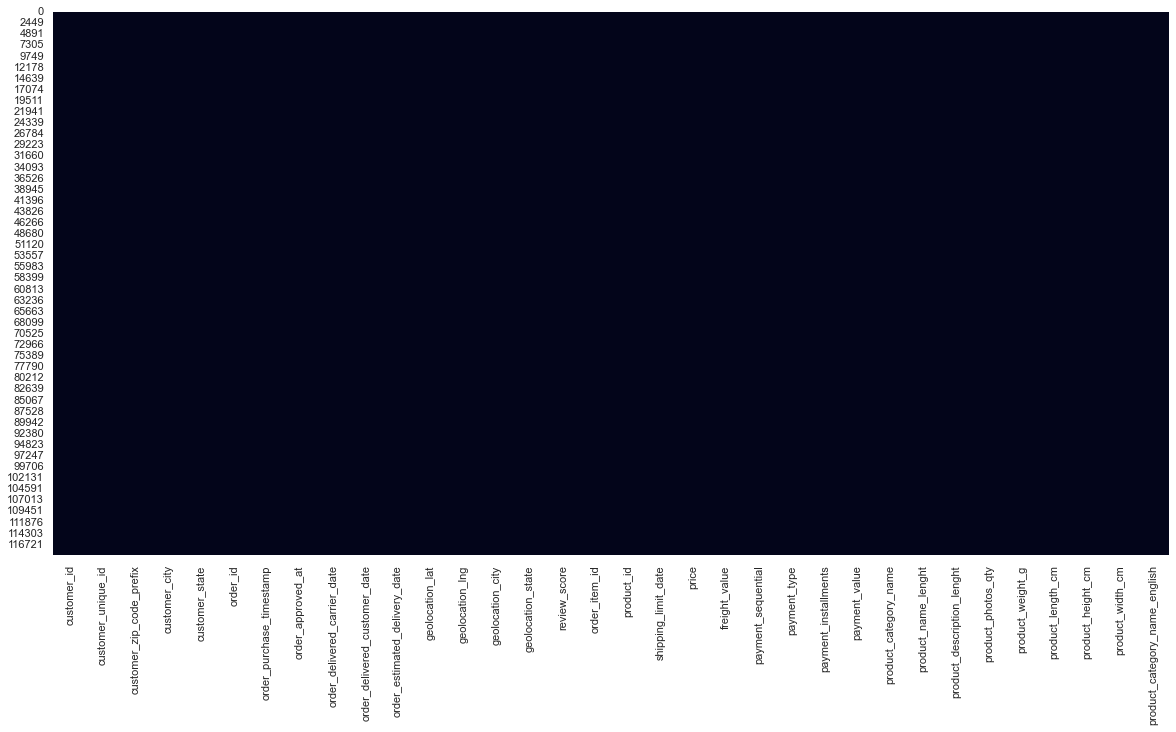

In [199]:
valeur_null (data, True,True)

In [200]:
data.shape

(112889, 34)

- **Traitement des duplicates**

In [201]:
def duplicates(data):
    
    """
    Affiche le nombre de duplicates dans "data", supprime
    les valeurs en doublons en conservant uniquement la première
    valeurs, renvoie un dataframe sans valeurs en double.
    """
    
    # Confirmer le nombre lignes dupliquées
    print(f"Il existe {data.duplicated().sum()} lignes dupliquées.")

    # Suppression des duplicates, on conserve juste la première 
    data = data.drop_duplicates(keep='first')

    # Confirmation de la supression des duplicates
    print(f"Après suppression, Il existe {data.duplicated().sum()} lignes dupliquées.")
    print(f"Returne le dataset avec {data.shape[0]} lignes")
    
    return data

In [202]:
data=duplicates(data)

Il existe 404 lignes dupliquées.
Après suppression, Il existe 0 lignes dupliquées.
Returne le dataset avec 112485 lignes


Regroupement des états en régions

In [203]:
# Les régions du Brésil sont une division territoriale officielle du Brésil

# Nous allons regrouper les états en régions selon le découpage officiel proposé par Institut Brésilien
               #de Géographie et de Statistiques

dict_regions = {
    
    "DF": "centre_ouest",
    "GO": "centre_ouest",
    "MS": "centre_ouest",
    "MT": "centre_ouest",
    
    "AL": "nord_est",
    "BA": "nord_est",
    "CE": "nord_est",
    "MA": "nord_est",
    "PE": "nord_est",
    "PB": "nord_est",
    "PI": "nord_est",
    "RN": "nord_est",
    "SE": "nord_est",
    
    
    "AC": "nord", 
    "AM": "nord",
    "AP": "nord",
    "PA": "nord",
    "RO": "nord",
    "RR": "nord",
    "TO": "nord",
    
    "ES": "sud_est",
    "MG": "sud_est",
    "RJ": "sud_est",
    "SP": "sud_est",
    
    "PR": "sud",
    "RS": "sud",
    "SC": "sud",
    
}

# Remplacement des noms d'états par leur région respective
data['customer_state'] = data['customer_state'].replace(dict_regions)

# Modification des noms de colonnes
data.rename(columns={'customer_state':'region'},inplace=True)

- **Source** : 
https://fr.wikipedia.org/wiki/R%C3%A9gions_du_Br%C3%A9sil#:~:text=R%C3%A9gions%20du%20Br%C3%A9sil%201%20R%C3%A9gion%20Centre-Ouest%202%20R%C3%A9gion,R%C3%A9gion%20Nord%204%20R%C3%A9gion%20Sud-Est%205%20R%C3%A9gion%20Sud


### Feature Engineering

Nous allons maintenant créer/calculer de nouvelles variables
à partir des informations que nous avons à notre disposition :


L'objectif est de comprendre nos clients et d'obtenir
des informations précises, qui décrieront au mieux leurs
comportements d'achat et l'expérience qu'ils ont eu
lors de leur(s) commande(s) sur Olist.

- **Nombre de commandes par client**

In [204]:
nb_order = pd.DataFrame(data.groupby(["customer_unique_id"])["order_id"].nunique())

nb_order.rename(columns={"order_id": "nb_order"}, inplace=True)

data = pd.merge(data,nb_order, on='customer_unique_id', how='inner')

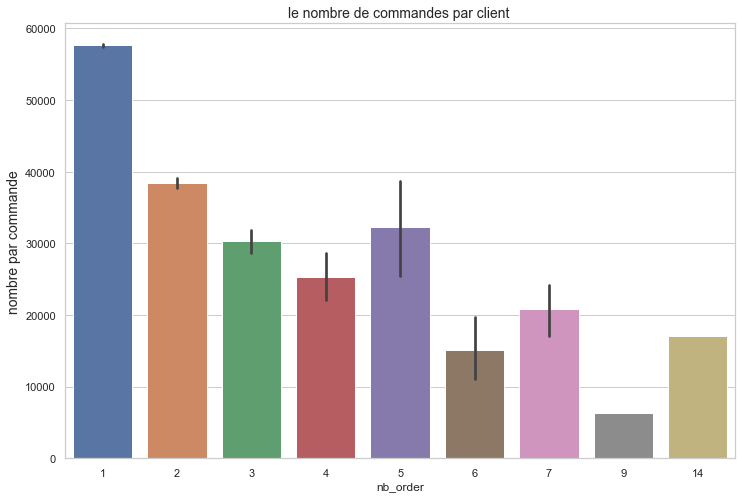

In [205]:
# barplot nombre de commandes par client

plt.figure(figsize=(12, 8))
sns.barplot(y=data.nb_order.index, x= data.nb_order.values ,capsize=None)
plt.title('le nombre de commandes par client ',fontsize =14 )
plt.ylabel('nombre par commande',fontsize=14)
plt.xlabel('nb_order',fontsize=12)
plt.show()

- **Panier moyen**

In [206]:
# Panier moyen
s_prix_mean = data.groupby('customer_unique_id')['price'].mean()
data['panier_moyen'] = data['customer_unique_id'].map(s_prix_mean)

 - **Catégorie la plus achetée**

In [207]:
best_category = pd.DataFrame(data.sort_values(
        ["customer_unique_id",'product_category_name_english'], ascending=False).groupby(
        ["customer_unique_id",'product_category_name_english']).head()[[
        "customer_unique_id", 'product_category_name_english']])

best_category.set_index("customer_unique_id", inplace=True)
best_category.columns = ['best_category']

data = pd.merge(data,best_category, on="customer_unique_id", how='inner')

- **Moyen de paiement préféré**

In [208]:
# Moyen de paiement préféré
df_moy_paiement = data[['customer_unique_id', 'payment_type']] \
    .sort_values(['customer_unique_id', 'payment_type'],
                 ascending=False).groupby(
    ['customer_unique_id', 'payment_type']).head(1)[
    ['customer_unique_id', 'payment_type']]
# Renommer la variable en moyen_paiement_prefere
df_moy_paiement.rename(
    columns={'payment_type': 'moyen_paiement_prefere'}, inplace=True)
# Merge avec dataframe date pour ajouter la variable
data = pd.merge(data, df_moy_paiement, on='customer_unique_id',
                how='left')

- **Moyenne du nombre des échéances de paiement**

In [209]:
# Moyenne du nombre des échéances de paiement
s_echeance_mean = round((data.groupby('customer_unique_id')[
    'payment_installments'].mean()),2)
data['echeance_paiement_mean'] = data['customer_unique_id'].map(
    s_echeance_mean)

- **délais de livraison**

In [210]:

# Transformation des colonnes en datetime
data["order_purchase_timestamp"] = pd.to_datetime(data["order_purchase_timestamp"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])

# création de la colonne délais de livraison (delivry_delay)
data["delivery_delay"] = (data["order_delivered_customer_date"] - data["order_purchase_timestamp"]).dt.days

-  **Retard de livraison**

In [211]:

# Transformation des colonnes en datetime
data["order_estimated_delivery_date"] = pd.to_datetime(data["order_estimated_delivery_date"])
data["order_delivered_customer_date"] = pd.to_datetime(data["order_delivered_customer_date"])

# création de la colonne délais de livraison (delivry_delay)
data["late_delivery"] = (data["order_estimated_delivery_date"] - data["order_delivered_customer_date"]).dt.days

- **Note moyenne des commentaires**

In [212]:

review_mean_score = round((pd.DataFrame(data.groupby('customer_unique_id')['review_score'].mean())),2)

review_mean_score.rename(columns={'review_score':'review_mean_score'},inplace=True)

data=pd.merge(data,review_mean_score, on='customer_unique_id', how='inner')

- **variable volume de commande**

In [213]:
# volume = height*lenght*width
data["product_volume_cm3"] = data["product_length_cm"] \
                               * data["product_height_cm"] \
                               * data["product_width_cm"]

In [214]:
volume_mean_value= pd.DataFrame(data.groupby(
        ['customer_unique_id'])['product_volume_cm3'].mean())

volume_mean_value.columns=['volume_mean_value']

data = pd.merge(data,volume_mean_value, on='customer_unique_id', how='inner')

-  **Panier moyen**

In [215]:
# Panier moyen
s_prix_mean = data.groupby('customer_unique_id')['price'].mean()
data['panier_moyen'] = data['customer_unique_id'].map(s_prix_mean)

#### Les 3 indicateurs RFM

- La segmentation RFM consiste à segmenter les clients en fonction de leur comportement d’achat.
- Elle permet aux marketeurs de cibler des segments de clients avec des messages plus pertinents basés sur leurs comportements d’achat.


C’est une segmentation 100% comportementale. On ne segmente pas les clients en fonction de ce qu’ils sont (genre, sexe, ville, catégorie socio-professionnelle…), ni en fonction de ce qu’ils aiment (centres d’intérêt, goûts), mais en fonction de ce qu’ils achètent. Le principe sous-jacent est simple : un client qui a acheté récemment, qui achète fréquemment et qui génère beaucoup de chiffre d’affaires commandera à nouveau, à coup quasiment sûr. Les chances de se tromper sont très faibles.
La segmentation RFM repose sur ces 3 critères :
   - Récence : date du dernier achat ou dernier contact client,
   - Fréquence : fréquence des achats sur une période de référence donnée,
   - Montant : somme des achats cumulés sur cette période.

- **Indicateur RFM - Récence**

Habituellement, en marketing, la date de référence est la date de dernière transaction plus 1 jour

In [216]:
# Période de commande (dernier achat)?
min = data['order_purchase_timestamp'].min().strftime('%d/%m/%Y %Hh%m')
max = data['order_purchase_timestamp'].max().strftime('%d/%m/%Y %Hh%m')
print(f'Période d\'achat : du {min} au {max}')

Période d'achat : du 03/10/2016 09h10 au 29/08/2018 15h08


In [217]:
import datetime
date_ref = data['order_purchase_timestamp'].max() + \
    datetime.timedelta(days=1)
s_dateref = date_ref.strftime('%d/%m/%Y %Hh%m')
print(f'Data de référence pour la récence : {s_dateref}')

Data de référence pour la récence : 30/08/2018 15h08


La date de dernier achat du client est calculé par : data['order_purchase_timestamp'].max()

In [218]:
# Alimentation du dictionnaire d'aggrégation pour une ligne de client
# unique
# Ajout de la récence en nombre de jours
dico_aggr_rfm = {'order_purchase_timestamp': lambda x: (
    date_ref - x.max()).days}
dico_rename_rfm = {'order_purchase_timestamp': 'rfm_recence'}

- **Indicateur RFM - Fréquence**

La fréquence est 'le nombre de fois où votre client a fait une transaction pendant une période donnée' donc le nombre de commande sur la période de l'étude 

In [219]:
# Alimentation du dictionnaire d'aggrégation pour une ligne de client
# unique
# Ajout de la fréquence en nombre d'achat sur la période
dico_aggr_rfm['order_id'] = 'count'
dico_rename_rfm['order_id'] = 'rfm_frequence'

- **Indicateur RFM - Montant**

Le montant correspond à la somme ou moyenne des dépenses de votre client : data['payment_value'].sum()

In [220]:
# Alimentation du dictionnaire d'aggrégation pour une ligne de client
# unique
# Ajout de la fréquence en nombre d'achat sur la période
dico_aggr_rfm['payment_value'] = 'sum'
dico_rename_rfm['payment_value'] = 'rfm_montant'

In [221]:
# Constitution du dataframe de travail RFM
df_rfm = data.groupby(('customer_unique_id'),as_index = False).agg(dico_aggr_rfm)
df_rfm.rename(columns=dico_rename_rfm, inplace=True)
df_rfm.reset_index()
df_rfm.shape

(91211, 4)

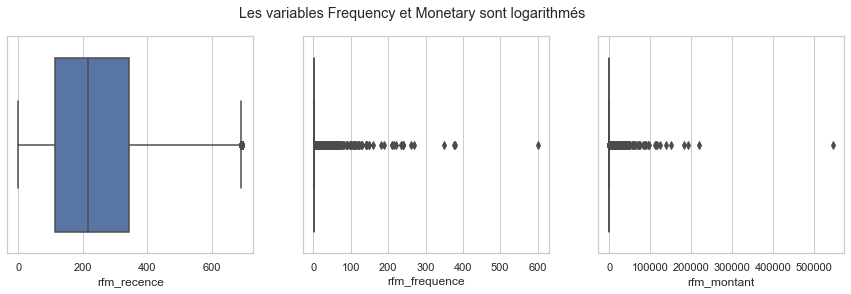

In [222]:
fig = plt.figure(1, figsize=(15, 4))

plt.suptitle("Les variables Frequency et Monetary sont logarithmés")

# Boxplot de la variable Recency
plt.subplot(131)
sns.boxplot(df_rfm["rfm_recence"])

# Boxplot de la variable Frequency
plt.subplot(132)
sns.boxplot(df_rfm["rfm_frequence"], orient="vertical")

# Boxplot de la variable Monetary
plt.subplot(133)
sns.boxplot(df_rfm["rfm_montant"], orient="vertical")
plt.show()

In [223]:
# Ajout des  indicateurs RFM au dataframe de travail global
data = pd.merge(data, df_rfm, on='customer_unique_id', how='left')
data.shape

(199620, 47)

In [224]:
# Export des données pour analyse RFM
df_rfm.to_csv('OLIST_RFM.csv')

### Céation du dataframe une ligne = un client

In [225]:
data.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'region', 'order_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'geolocation_state', 'review_score', 'order_item_id', 'product_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'nb_order', 'panier_moyen',
       'best_category', 'moyen_paiement_prefere', 'echeance_paiement_mean',
       'delivery_delay', 'late_delivery', 'review_mean_score',
       'product_volume_cm3', 

In [226]:
# Pour information :
# Suite aux features engineering, les variables de jointure ou ayant
# servant à créer de nouvelles variables ne sont plus utiles
cols_a_supp = ['customer_id', 'customer_zip_code_prefix', 'order_id',
               'order_approved_at',
               'order_delivered_carrier_date',
               'order_delivered_customer_date',
               'order_estimated_delivery_date',
               'review_score', 'order_item_id', 'product_id',
               'shipping_limit_date', 'price', 'freight_value',
               'payment_sequential', 'payment_type','product_category_name',
               'product_name_lenght','product_description_lenght', 'product_photos_qty',
                'product_weight_g','product_length_cm', 'product_height_cm', 
               'product_width_cm',
               'payment_value','customer_city', 'geolocation_state',
               'product_category_name_english']

In [227]:
df=data.copy()

In [228]:
df.drop(columns=cols_a_supp,axis=1,inplace=True)

In [229]:
df.columns

Index(['customer_unique_id', 'region', 'order_purchase_timestamp',
       'geolocation_lat', 'geolocation_lng', 'geolocation_city',
       'payment_installments', 'nb_order', 'panier_moyen', 'best_category',
       'moyen_paiement_prefere', 'echeance_paiement_mean', 'delivery_delay',
       'late_delivery', 'review_mean_score', 'product_volume_cm3',
       'volume_mean_value', 'rfm_recence', 'rfm_frequence', 'rfm_montant'],
      dtype='object')

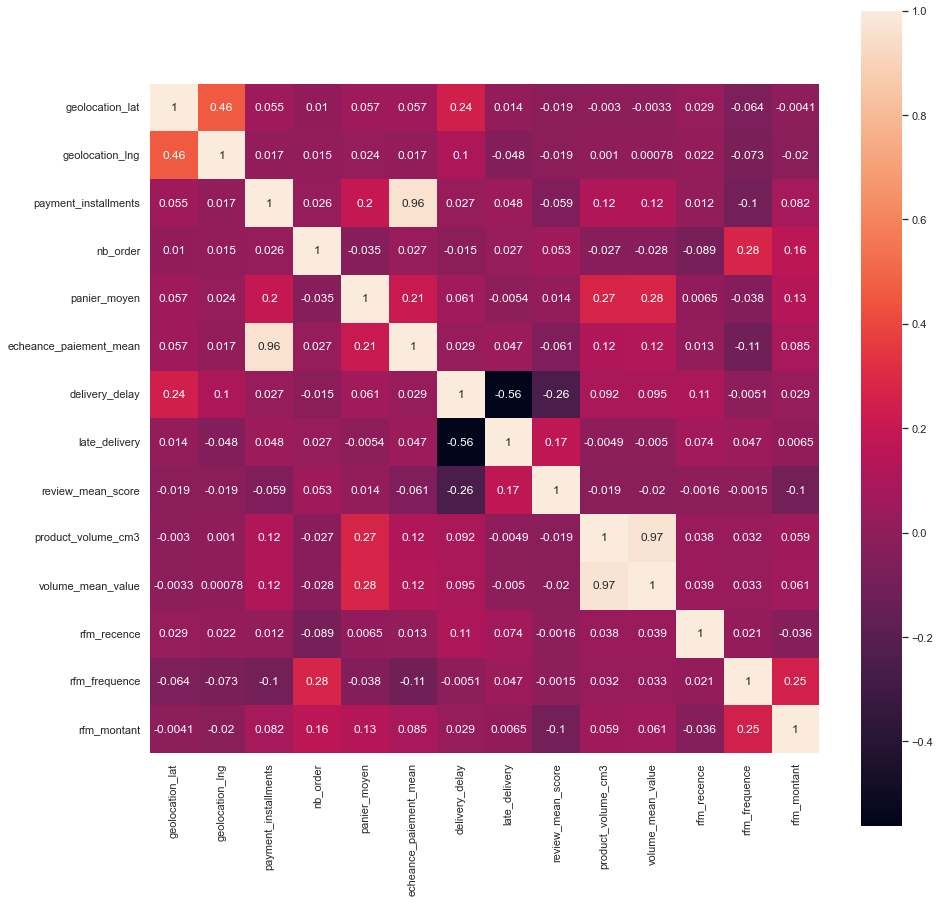

In [230]:
# Matrice de corrélation
cols_num = df.select_dtypes(include=[np.number]).columns.to_list()

plt.figure(figsize=(15, 15))
sns.heatmap(df[cols_num].corr(), annot=True, square=True)
plt.show()

In [232]:
# les variable qui nous donne des information sur les clients utiliser dans la suite de projet 

cols_a_garder=['customer_unique_id','moyen_paiement_prefere','panier_moyen',
     'order_purchase_timestamp','review_mean_score','payment_installments', 'best_category',
               'geolocation_lat', 'geolocation_lng', 'rfm_recence', 'rfm_frequence', 'rfm_montant']
     

In [233]:
data_client_stab = df[cols_a_garder]

In [234]:
data_client_stab

customer_unique_id moyen_paiement_prefere  panier_moyen  \
0       861eff4711a542e4b93843c6dd7febb0            credit_card        124.99   
1       290c77bc529b7ac935b93aa66c333dc3            credit_card        289.00   
2       060e732b5b29e8181a18229c7b0b2b5e            credit_card        139.94   
3       259dac757896d24d7702b9acbbff3f3c            credit_card        149.94   
4       345ecd01c38d18a9036ed96c73b8d066            credit_card        230.00   
...                                  ...                    ...           ...   
199615  1a29b476fee25c95fbafc67c5ac95cf8            credit_card         74.90   
199616  d52a67c98be1cf6a5c84435bd38d095d            credit_card        114.90   
199617  e9f50caf99f032f0bf3c55141f019d99            credit_card         37.00   
199618  73c2643a0a458b49f58cea58833b192e            credit_card        689.00   
199619  84732c5050c01db9b23e19ba39899398            credit_card         13.99   

       order_purchase_timestamp  review_mean_score  payment_installments  \
0           2017-05-16 15:05:35                4.0                   2.0   
1           2018-01-12 20:48:24                5.0                   8.0   
2           2018-05-19 16:07:45                5.0                   7.0   
3           2018-03-13 16:06:38                5.0                   1.0   
4           2018-07-29 09:51:30                5.0                   8.0   
...                         ...                ...                   ...   
199615      2018-04-07 15:48:17                4.0                   6.0   
199616      2018-04-04 08:20:22                5.0                   3.0   
199617      2018-04-08 20:11:50                1.0                   5.0   
199618      2017-11-03 21:08:33                5.0                   2.0   
199619      2017-12-19 14:27:23                5.0                   1.0   

                best_category  geolocation_lat  geolocation_lng  rfm_recence  \
0                      office       -20.509897       -47.397866          470   
1                        home       -23.726853       -46.545746          229   
2                      office       -23.527788       -46.660310          102   
3                      office       -23.496930       -46.185352          169   
4                        home       -22.987222       -47.151073           32   
...                       ...              ...              ...          ...   
199615  culture_entertainment       -23.587901       -46.501830          144   
199616  culture_entertainment       -23.612294       -46.765787          148   
199617          health_beauty        -3.744128       -38.510859          143   
199618  computers_electronics       -29.956391       -51.167614          299   
199619          health_beauty       -23.593985       -46.910591          254   

        rfm_frequence  rfm_montant  
0                   1       146.87  
1                   1       335.48  
2                   1       157.73  
3                   1       173.30  
4                   1       252.25  
...               ...          ...  
199615              1        88.78  
199616              1       129.06  
199617              1        56.04  
199618              1       711.07  
199619              1        21.77  

[199620 rows x 12 columns]

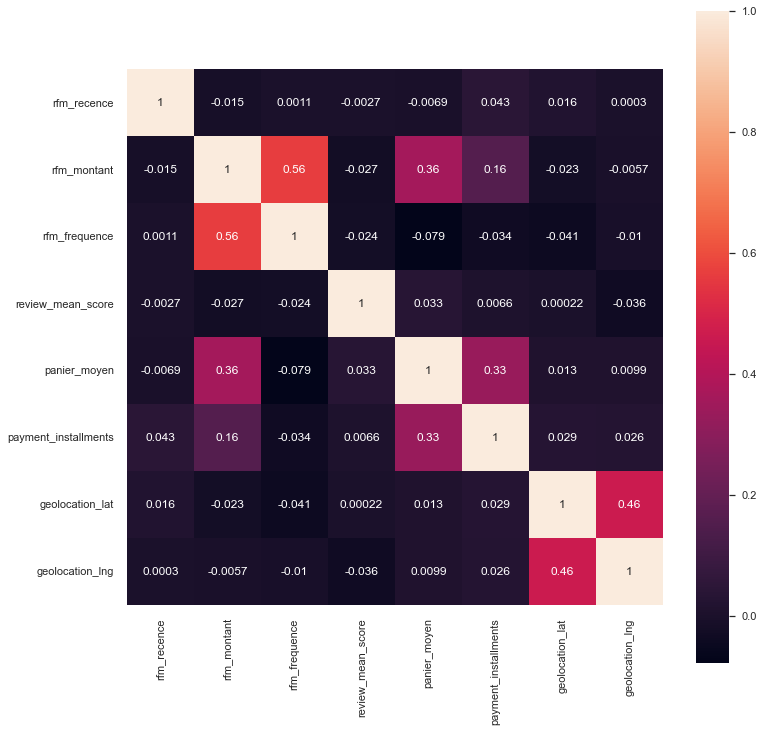

In [130]:
# Matrice de corrélation
cols_num = df.select_dtypes(include=[np.number]).columns.to_list()

plt.figure(figsize=(12, 12))
sns.heatmap(df[cols_num].corr(), annot=True, square=True)
plt.show()

In [136]:
# Export des données pour analyser la stabilité des clients sur plusieurs périodes
data_client_stab.to_csv('OLIST_data_client_stab.csv')

#### Filtrage des customer_unique_id


L'objectif ici est de ne conserver qu'une seule entrée / client.Un client est identifié par son identifiant 'customer_unique_id'.

In [235]:
data_client_stab.columns

Index(['customer_unique_id', 'moyen_paiement_prefere', 'panier_moyen',
       'order_purchase_timestamp', 'review_mean_score', 'payment_installments',
       'best_category', 'geolocation_lat', 'geolocation_lng', 'rfm_recence',
       'rfm_frequence', 'rfm_montant'],
      dtype='object')

In [138]:
# Dictionnaire permettant de faire les aggrégations
dico_aggr = {'region': lambda x: x.mode()[0],
             'rfm_recence': 'mean',
             'rfm_frequence': 'mean',
             'rfm_montant': 'mean',
             'late_delivery': 'mean',
             'delivery_delay': 'mean',
             'review_mean_score':'mean',
             'nb_order': 'mean',
             'geolocation_lat': 'mean',
             'geolocation_lng': 'mean',
             'freight_percentage': 'mean',
             'panier_moyen':'mean',
             'freight_percentage': 'mean',
             'echeance_paiement_mean': 'mean',
             'payment_installments': 'mean',
             'moyen_paiement_prefere': lambda x: x.mode()[0],
             'best_category':lambda x: x.mode()[0],
             'order_purchase_timestamp': lambda x: x.mode()[0],
             }

In [139]:
# Aggrégation des différentes variables avec l'identifiant unique
data_client = data_client_stab.groupby(['customer_unique_id']).agg(dico_aggr)

In [140]:
data_client

region  rfm_recence  rfm_frequence  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2       sud_est        112.0            1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f       sud_est        115.0            1.0   
0000f46a3911fa3c0805444483337064           sud        537.0            1.0   
0000f6ccb0745a6a4b88665a16c9f078          nord        321.0            1.0   
0004aac84e0df4da2b147fca70cf8255       sud_est        288.0            1.0   
...                                        ...          ...            ...   
fffcf5a5ff07b0908bd4e2dbc735a684      nord_est        447.0            4.0   
fffea47cd6d3cc0a88bd621562a9d061      nord_est        262.0            1.0   
ffff371b4d645b6ecea244b27531430a  centre_ouest        568.0            1.0   
ffff5962728ec6157033ef9805bacc48       sud_est        119.0            1.0   
ffffd2657e2aad2907e67c3e9daecbeb           sud        484.0            1.0   

                                  rfm_montant  late_delivery  delivery_delay  \
customer_unique_id                                                             
0000366f3b9a7992bf8c76cfdf3221e2       141.90            4.0             6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f        27.19            4.0             3.0   
0000f46a3911fa3c0805444483337064        86.22            1.0            25.0   
0000f6ccb0745a6a4b88665a16c9f078        43.62           11.0            20.0   
0004aac84e0df4da2b147fca70cf8255       196.89            7.0            13.0   
...                                       ...            ...             ...   
fffcf5a5ff07b0908bd4e2dbc735a684      8269.68           26.0            27.0   
fffea47cd6d3cc0a88bd621562a9d061        84.58            2.0            30.0   
ffff371b4d645b6ecea244b27531430a       112.46           29.0            14.0   
ffff5962728ec6157033ef9805bacc48       133.69           13.0            11.0   
ffffd2657e2aad2907e67c3e9daecbeb        71.56           15.0             7.0   

                                  review_mean_score  nb_order  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2                5.0       1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0       1.0   
0000f46a3911fa3c0805444483337064                3.0       1.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0       1.0   
0004aac84e0df4da2b147fca70cf8255                5.0       1.0   
...                                             ...       ...   
fffcf5a5ff07b0908bd4e2dbc735a684                5.0       1.0   
fffea47cd6d3cc0a88bd621562a9d061                4.0       1.0   
ffff371b4d645b6ecea244b27531430a                5.0       1.0   
ffff5962728ec6157033ef9805bacc48                5.0       1.0   
ffffd2657e2aad2907e67c3e9daecbeb                5.0       1.0   

                                  geolocation_lat  geolocation_lng  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2       -23.335331       -46.828647   
0000b849f77a49e4a4ce2b2a4ca5be3f       -23.567395       -46.792957   
0000f46a3911fa3c0805444483337064       -27.543787       -48.625680   
0000f6ccb0745a6a4b88665a16c9f078        -1.311011       -48.482884   
0004aac84e0df4da2b147fca70cf8255       -23.504368       -47.466156   
...                                           ...              ...   
fffcf5a5ff07b0908bd4e2dbc735a684        -8.363166       -36.559088   
fffea47cd6d3cc0a88bd621562a9d061       -12.221792       -38.962517   
ffff371b4d645b6ecea244b27531430a       -11.829317       -55.496443   
ffff5962728ec6157033ef9805bacc48       -21.125061       -41.666268   
ffffd2657e2aad2907e67c3e9daecbeb       -25.456502       -49.435381   

                                  freight_percentage  panier_moyen  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                0.08        129.90   
0000b849f77a49e4a

#### Réduction de l'influence des outliers


Detection d'anomalies avec Isolation Forest

Par exemple :

des très haut valeurs monétaires


des très fréquents acheteurs


des paiements en 24 fois


des frappes erronées


Ces données peuvent avoir une influence trop fort sur les clusters. On va les identifier, et si besoin, les éliminer.



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html


https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection


https://machinelearningmastery.com/anomaly-detection-with-isolation-forest-and-kernel-density-estimation/



In [141]:
df1 = data_client.copy()
df1=df1[[ 'rfm_recence', 'rfm_montant','rfm_frequence','review_mean_score', 'panier_moyen', 'payment_installments',
       'geolocation_lat', 'geolocation_lng','moyen_paiement_prefere', 'best_category','order_purchase_timestamp' ]]
df = df1.copy()
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import IsolationForest

# Definition of categorical variables

cat_cols = df.select_dtypes(include=['object', 'bool']).columns
cat_cols
# Definition of numerical variables
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols
scaler = StandardScaler()

preprocessor = ColumnTransformer([
    ('scaler', scaler, num_cols)])
X = preprocessor.fit((df))
X = preprocessor.transform((df))
model = IsolationForest(random_state=0, contamination=0.05)
model.fit(X)
outliers = model.predict(X) == -1
df[outliers].head(4)
index_to_drop = df[outliers].index
df.drop(index_to_drop,0, inplace=True)
df.shape

(86650, 11)

In [142]:
df

rfm_recence  rfm_montant  rfm_frequence  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2        112.0       141.90            1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f        115.0        27.19            1.0   
0000f46a3911fa3c0805444483337064        537.0        86.22            1.0   
0000f6ccb0745a6a4b88665a16c9f078        321.0        43.62            1.0   
0004aac84e0df4da2b147fca70cf8255        288.0       196.89            1.0   
...                                       ...          ...            ...   
fffb09418989a0dbff854a28163e47c6        255.0        73.16            1.0   
fffea47cd6d3cc0a88bd621562a9d061        262.0        84.58            1.0   
ffff371b4d645b6ecea244b27531430a        568.0       112.46            1.0   
ffff5962728ec6157033ef9805bacc48        119.0       133.69            1.0   
ffffd2657e2aad2907e67c3e9daecbeb        484.0        71.56            1.0   

                                  review_mean_score  panier_moyen  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2                5.0        129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0         18.90   
0000f46a3911fa3c0805444483337064                3.0         69.00   
0000f6ccb0745a6a4b88665a16c9f078                4.0         25.99   
0004aac84e0df4da2b147fca70cf8255                5.0        180.00   
...                                             ...           ...   
fffb09418989a0dbff854a28163e47c6                5.0         58.00   
fffea47cd6d3cc0a88bd621562a9d061                4.0         64.89   
ffff371b4d645b6ecea244b27531430a                5.0         89.90   
ffff5962728ec6157033ef9805bacc48                5.0        115.00   
ffffd2657e2aad2907e67c3e9daecbeb                5.0         56.99   

                                  payment_installments  geolocation_lat  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                   8.0       -23.335331   
0000b849f77a49e4a4ce2b2a4ca5be3f                   1.0       -23.567395   
0000f46a3911fa3c0805444483337064                   8.0       -27.543787   
0000f6ccb0745a6a4b88665a16c9f078                   4.0        -1.311011   
0004aac84e0df4da2b147fca70cf8255                   6.0       -23.504368   
...                                                ...              ...   
fffb09418989a0dbff854a28163e47c6                   1.0       -28.935745   
fffea47cd6d3cc0a88bd621562a9d061                   1.0       -12.221792   
ffff371b4d645b6ecea244b27531430a                   1.0       -11.829317   
ffff5962728ec6157033ef9805bacc48                   5.0       -21.125061   
ffffd2657e2aad2907e67c3e9daecbeb                   4.0       -25.456502   

                                  geolocation_lng moyen_paiement_prefere  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2       -46.828647            credit_card   
0000b849f77a49e4a4ce2b2a4ca5be3f       -46.792957            credit_card   
0000f46a3911fa3c0805444483337064       -48.625680            credit_card   
0000f6ccb0745a6a4b88665a16c9f078       -48.482884            credit_card   
0004aac84e0df4da2b147fca70cf8255       -47.466156            credit_card   
...                                           ...                    ...   
fffb09418989a0dbff854a28163e47c6       -51.552048                 boleto   
fffea47cd6d3cc0a88bd621562a9d061       -38.962517            credit_card   
ffff371b4d645b6ecea244b27531430a       -55.496443            credit_card   
ffff5962728ec6157033ef9805bacc48       -41.666268            credit_card   
ffffd2657e2aad2907e67c3e9daecbeb       -49.435381            credit_card   

                                          best_category  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                   

In [145]:
# Export des données nettoyées sans pré-processing
df.to_csv('OLIST_data_client_clean.csv',index=False)

In [144]:
# # Export des données pour analyser la stabilité des clients sur plusieurs périodes
df.to_csv('OLIST_data_client_clean_stab.csv',index='customer_unique_id')